Spam Data

Load the spam data set.

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

Is there any overlap in the bigrams for the spam data and the ham data?

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import matplotlib as mpl
from wordcloud import WordCloud
import acquire as a
import prepare as prep
import explore as ex

In [4]:
def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df

In [14]:
df = pd.read_csv('spam.csv')
print(df.shape)
df.head()

(5572, 3)


id label                                               text
0   0   ham  Go until jurong point, crazy.. Available only ...
1   1   ham                      Ok lar... Joking wif u oni...
2   2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   3   ham  U dun say so early hor... U c already then say...
4   4   ham  Nah I don't think he goes to usf, he lives aro...

In [15]:
df = prep.prepare_data(df, 'text', ['i','she', 'he', 'you'])

In [16]:
df.head()

id label                                               text  \
0   0   ham  Go until jurong point, crazy.. Available only ...   
1   1   ham                      Ok lar... Joking wif u oni...   
2   2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   3   ham  U dun say so early hor... U c already then say...   
4   4   ham  Nah I don't think he goes to usf, he lives aro...   

                                               clean  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                             stemmed  \
0  go jurong point crazi avail bugi n great world...   
1                              ok lar joke wif u oni   
2  free entri 2 wkli comp win fa cup final tkt 21...   
3                u dun say earli hor u c alreadi say   
4          nah dont think goe usf live around though   

                                          lemmatized  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though

In [17]:
ham_words =' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

In [19]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

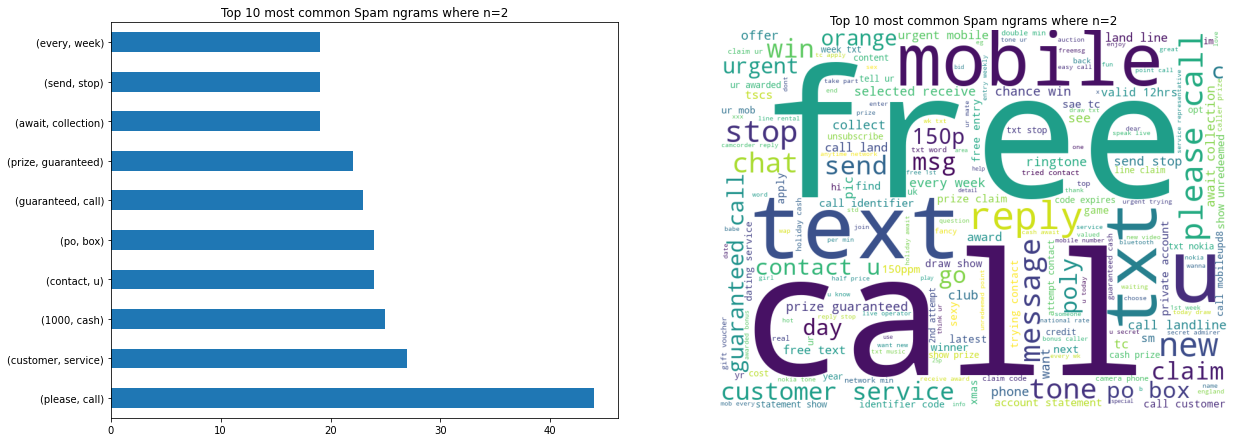

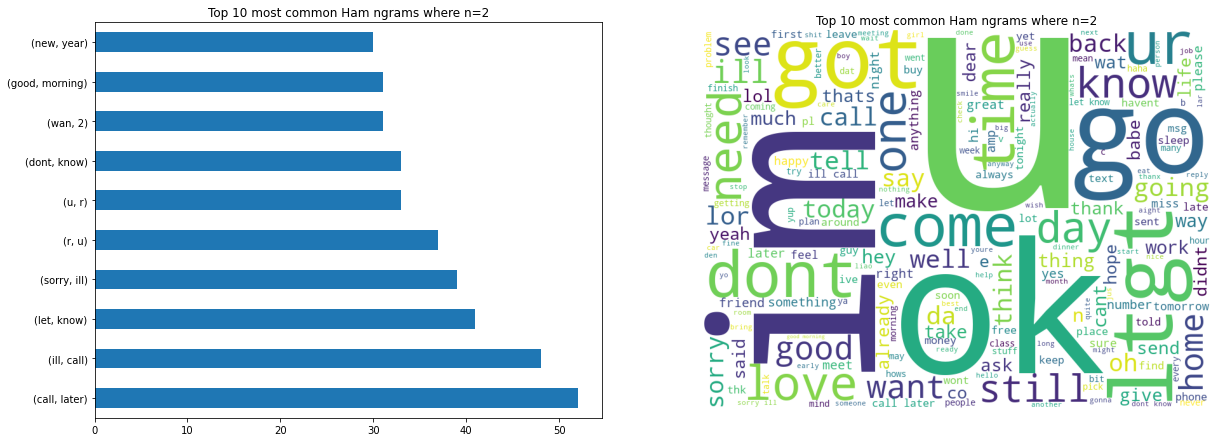

In [20]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'])

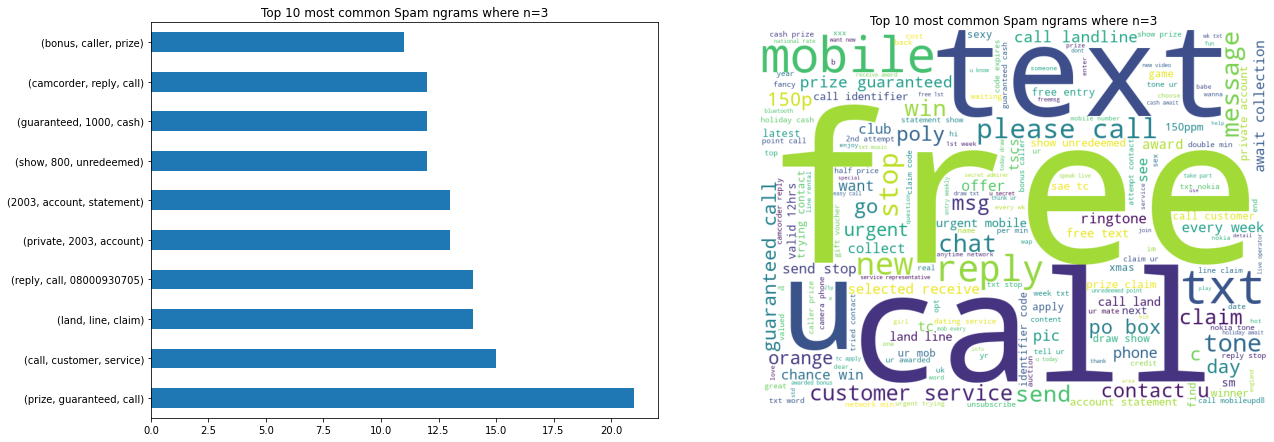

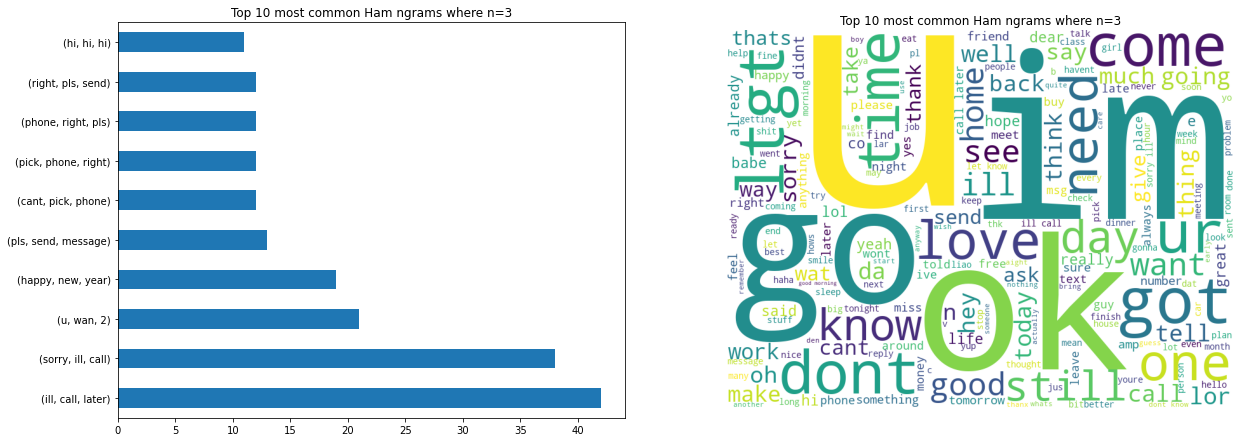

In [21]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'], n=3)

In [22]:
list_articles = a.get_blog_articles()

In [23]:
list_articles

title     published  \
0              Learn to Code: Python Workshop on 4/23  Mar 31, 2022   
1                   Coming Soon: Cloud Administration  Mar 17, 2022   
2             5 Books Every Woman In Tech Should Read   Mar 8, 2022   
3                   Codeup Start Dates for March 2022  Jan 26, 2022   
4   VET TEC Funding Now Available For Dallas Veterans   Jan 7, 2022   
5       Dallas Campus Re-opens With New Grant Partner  Dec 30, 2021   
6   Codeup’s Placement Team Continues Setting Records  Nov 19, 2021   
7   IT Certifications 101: Why They Matter, and Wh...  Nov 18, 2021   
8   A rise in cyber attacks means opportunities fo...  Nov 17, 2021   
9    Use your GI Bill® benefits to Land a Job in Tech   Nov 4, 2021   
10  Which program is right for me: Cyber Security ...  Oct 28, 2021   
11               What the Heck is System Engineering?  Oct 21, 2021   
12     From Speech Pathology to Business Intelligence  Oct 18, 2021   
13                      Boris – Behind the Billboards   Oct 3, 2021   
14  Is Codeup the Best Bootcamp in San Antonio…or ...  Sep 16, 2021   

                                              content  
0   According to LinkedIn, the “#1 Most Promising ...  
1   We’re launching a new program out of San Anton...  
2   On this International Women’s Day 2022 we want...  
3   As we approach the end of January we wanted to...  
4   We are so happy to announce that VET TEC benef...  
5   We are happy to announce that our Dallas campu...  
6   Our Placement Team is simply defined as a grou...  
7   AWS, Google, Azure, Red Hat, CompTIA…these are...  
8   In the last few months, the US has experienced...  
9   As the end of military service gets closer, ma...  
10  What IT Career should I choose?\nIf you’re thi...  
11  Codeup offers a 13-week training program: Syst...  
12  By: Alicia Gonzalez\nBefore Codeup, I was a ho...  
13                                                     
14  Looking for the best data science bootcamp in ...

In [24]:
new_articles =prep.prepare_data(list_articles, 'content', ['weve'])

In [25]:
new_articles.head(10)

title     published  \
0             Learn to Code: Python Workshop on 4/23  Mar 31, 2022   
1                  Coming Soon: Cloud Administration  Mar 17, 2022   
2            5 Books Every Woman In Tech Should Read   Mar 8, 2022   
3                  Codeup Start Dates for March 2022  Jan 26, 2022   
4  VET TEC Funding Now Available For Dallas Veterans   Jan 7, 2022   
5      Dallas Campus Re-opens With New Grant Partner  Dec 30, 2021   
6  Codeup’s Placement Team Continues Setting Records  Nov 19, 2021   
7  IT Certifications 101: Why They Matter, and Wh...  Nov 18, 2021   
8  A rise in cyber attacks means opportunities fo...  Nov 17, 2021   
9   Use your GI Bill® benefits to Land a Job in Tech   Nov 4, 2021   

                                             content  \
0  According to LinkedIn, the “#1 Most Promising ...   
1  We’re launching a new program out of San Anton...   
2  On this International Women’s Day 2022 we want...   
3  As we approach the end of January we wanted to...   
4  We are so happy to announce that VET TEC benef...   
5  We are happy to announce that our Dallas campu...   
6  Our Placement Team is simply defined as a grou...   
7  AWS, Google, Azure, Red Hat, CompTIA…these are...   
8  In the last few months, the US has experienced...   
9  As the end of military service gets closer, ma...   

                                               clean  \
0  according linkedin 1 promising job data scienc...   
1  launching new program san antonio acquisition ...   
2  international womens day 2022 wanted tell stor...   
3  approach end january wanted look forward next ...   
4  happy announce vet tec benefits available used...   
5  happy announce dallas campus reopened better y...   
6  placement team simply defined group manages re...   
7  aws google azure red hat comptiathese big name...   
8  last months us experienced dozens major cybera...   
9  end military service gets closer many transiti...   

                                             stemmed  \
0  accord linkedin 1 promis job data scienc codeu...   
1  launch new program san antonio acquisit racksp...   
2  intern women day 2022 want tell stori women te...   
3  approach end januari want look forward next st...   
4  happi announc vet tec benefit avail use campu ...   
5  happi announc dalla campu reopen better yet ne...   
6  placement team simpli defin group manag relati...   
7  aw googl azur red hat comptiathes big name pro...   
8  last month us experienc dozen major cyberattac...   
9  end militari servic get closer mani transit se...   

                                          lemmatized  
0  according linkedin 1 promising job data scienc...  
1  launching new program san antonio acquisition ...  
2  international woman day 2022 wanted tell story...  
3  approach end january wanted look forward next ...  
4  happy announce vet tec benefit available used ...  
5  happy announce dallas campus reopened better y...  
6  placement team simply defined group manages re...  
7  aws google azure red hat comptiathese big name...  
8  last month u experienced dozen major cyberatta...  
9  end military service get closer many transitio...

In [26]:
titles = list(new_articles['title'].value_counts().index)

In [28]:
# join all the text of each categotyb
join_text ={}
for ti in titles :
    join_text[ti] = prep.basic_clean(' '.join(new_articles[new_articles.title == ti].lemmatized))

# add all words 
join_text['all_words']= prep.basic_clean(' '.join(new_articles.lemmatized))

In [29]:
join_text.keys()

dict_keys(['Learn to Code: Python Workshop on 4/23', 'Coming Soon: Cloud Administration', '5 Books Every Woman In Tech Should Read', 'Codeup Start Dates for March 2022', 'VET TEC Funding Now Available For Dallas Veterans', 'Dallas Campus Re-opens With New Grant Partner', 'Codeup’s Placement Team Continues Setting Records', 'IT Certifications 101: Why They Matter, and Why They Don’t', 'A rise in cyber attacks means opportunities for veterans in San Antonio', 'Use your GI Bill® benefits to Land a Job in Tech', 'Which program is right for me: Cyber Security or Systems Engineering?', 'What the Heck is System Engineering?', 'From Speech Pathology to Business Intelligence', 'Boris – Behind the Billboards', 'Is Codeup the Best Bootcamp in San Antonio…or the World?', 'all_words'])

In [30]:
# create a word_count df
word_counts= pd.DataFrame()
for cat in join_text:
    word_counts[cat] = pd.Series(join_text[cat].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [31]:
word_counts.head()

Learn to Code: Python Workshop on 4/23  \
python                                         4   
data                                           4   
science                                        4   
workshop                                       3   
learn                                          3   

          Coming Soon: Cloud Administration  \
python                                    0   
data                                      1   
science                                   1   
workshop                                  0   
learn                                     3   

          5 Books Every Woman In Tech Should Read  \
python                                          0   
data                                            1   
science                                         1   
workshop                                        0   
learn                                           1   

          Codeup Start Dates for March 2022  \
python                                    0   
data                                      5   
science                                   4   
workshop                                  1   
learn                                     1   

          VET TEC Funding Now Available For Dallas Veterans  \
python                                                    0   
data                                                      0   
science                                                   0   
workshop                                                  3   
learn                                                     0   

          Dallas Campus Re-opens With New Grant Partner  \
python                                                0   
data                                                  0   
science                                               0   
workshop                                              0   
learn                                                 0   

          Codeup’s Placement Team Continues Setting Records  \
python                                                    0   
data                                                      2   
science                                                   0   
workshop                                                  0   
learn                                                     0   

          IT Certifications 101: Why They Matter, and Why They Don’t  \
python                                                    0            
data                                                      0            
science                                                   0            
workshop                                                  0            
learn                                                     1            

          A rise in cyber attacks means opportunities for veterans in San Antonio  \
python                                                    0                         
data                                                      0                         
science                                                   0                         
workshop                                                  0                         
learn                                                     0                         

          Use your GI Bill® benefits to Land a Job in Tech  \
python                                                   1   
data                                                     2   
science                                                  2   
workshop                                                 0   
learn                                                    4   

          Which program is right for me: Cyber Security or Systems Engineering?  \
python                                                    0                       
data                                                      1                       
science                                                   0                       
workshop                                          

<Figure size 1440x1080 with 0 Axes>

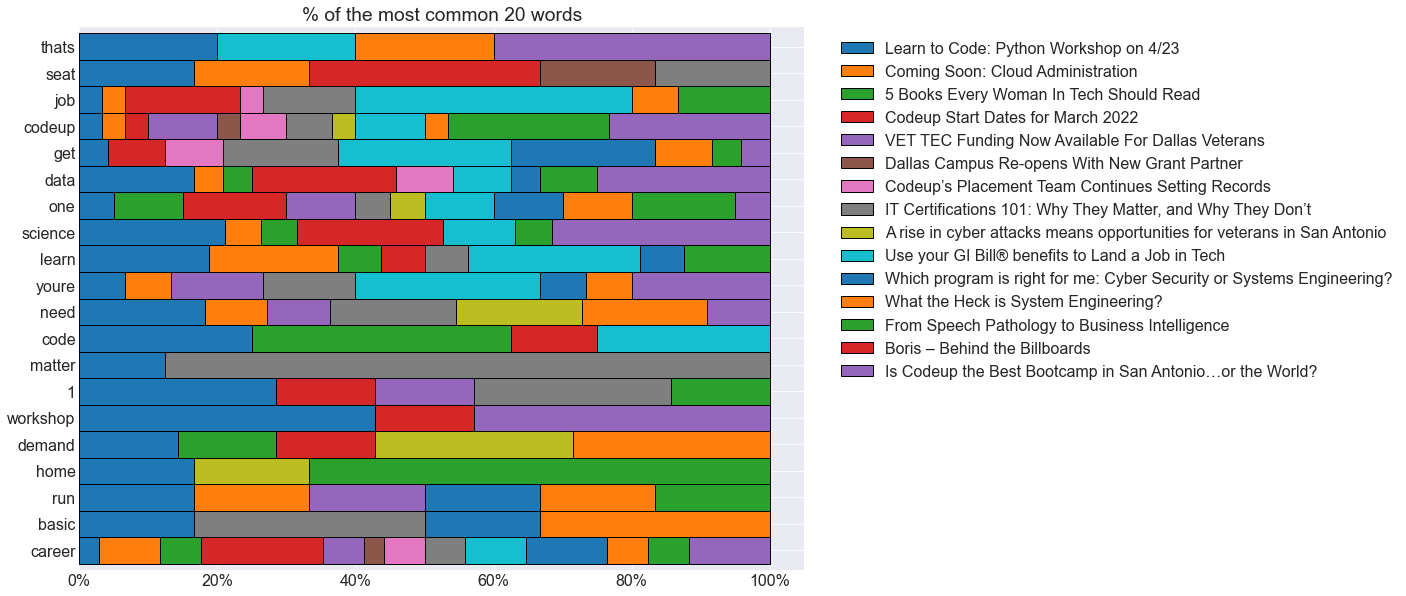

In [33]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1).sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

<Figure size 936x576 with 0 Axes>

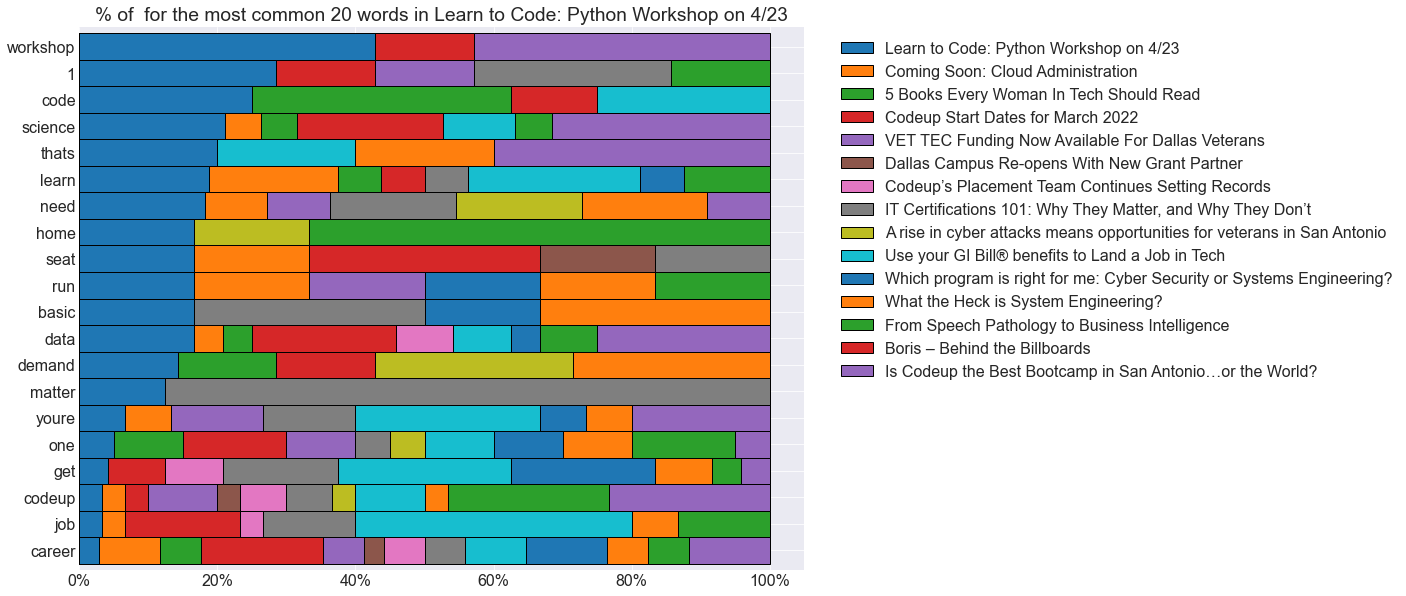

<Figure size 936x576 with 0 Axes>

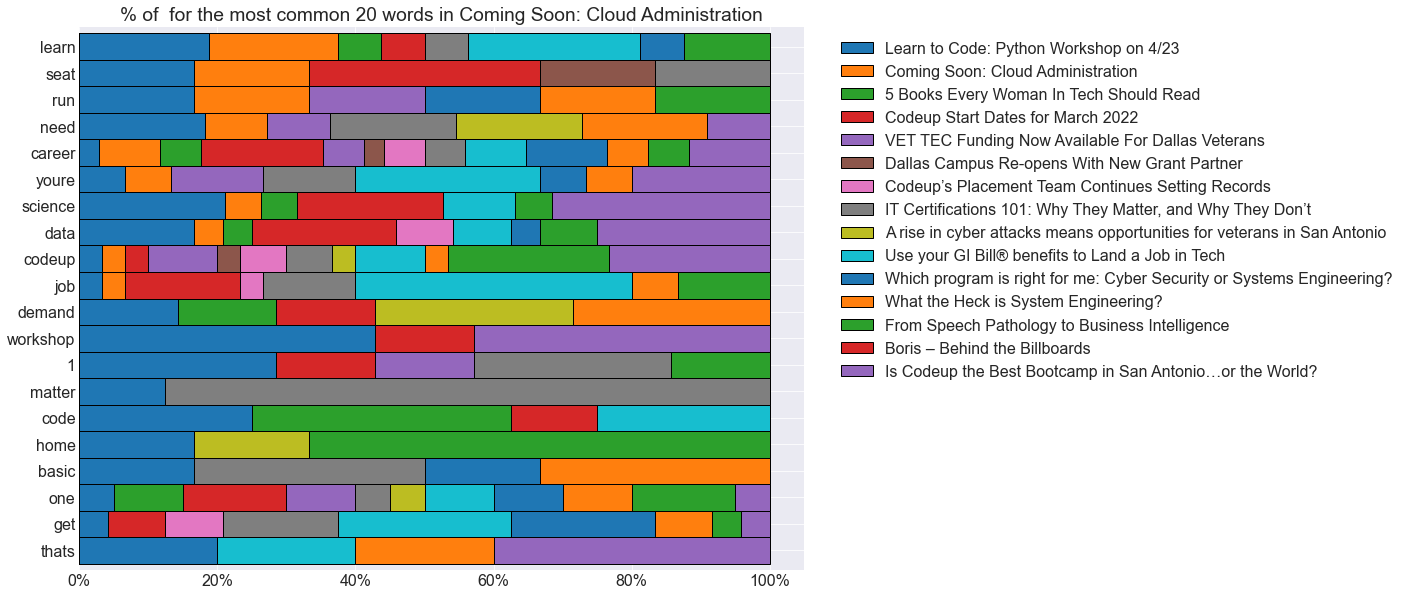

<Figure size 936x576 with 0 Axes>

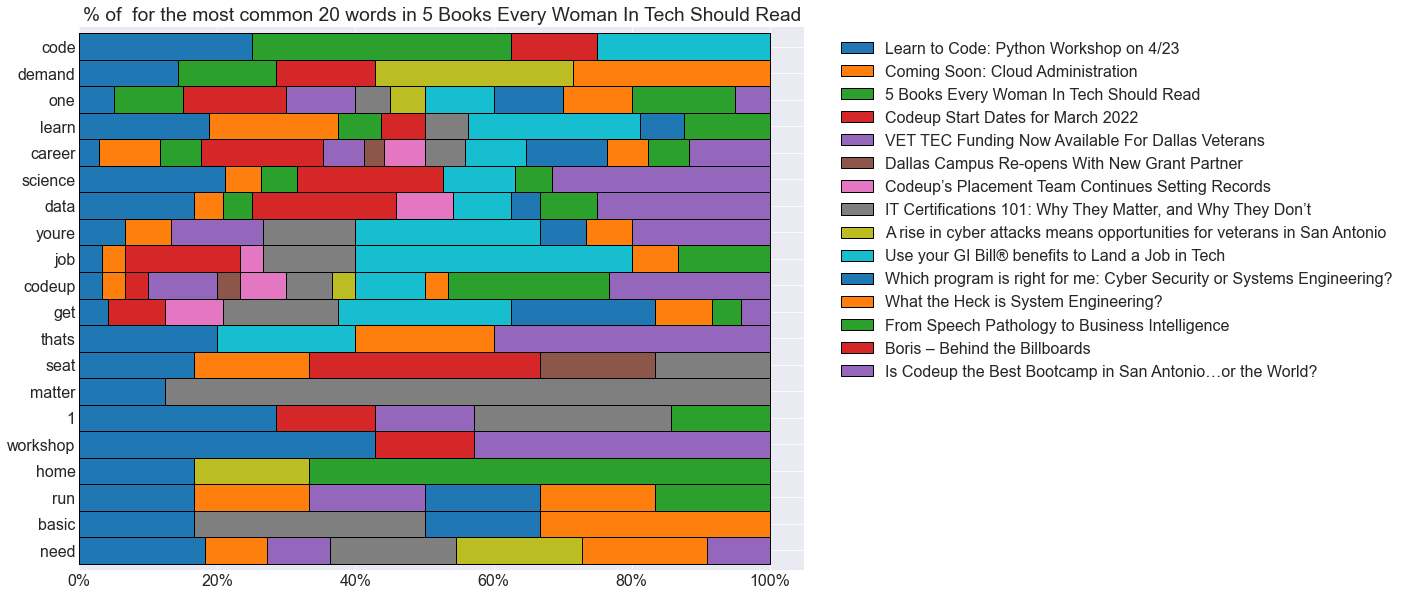

<Figure size 936x576 with 0 Axes>

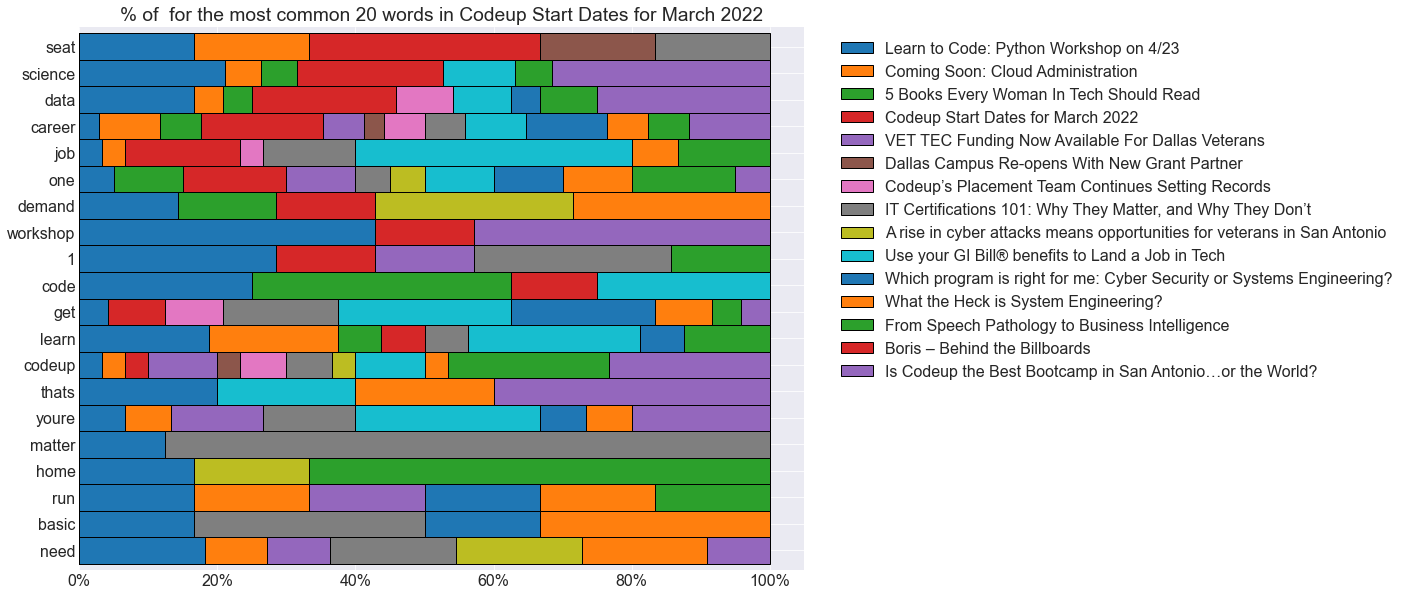

<Figure size 936x576 with 0 Axes>

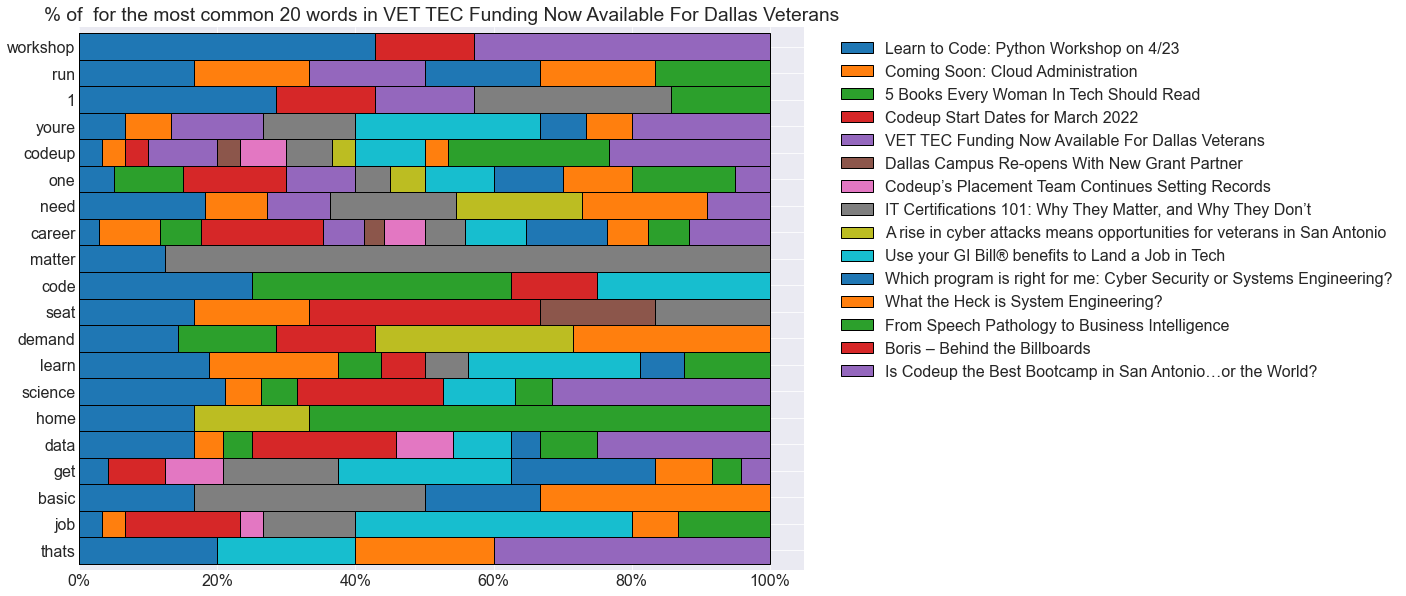

<Figure size 936x576 with 0 Axes>

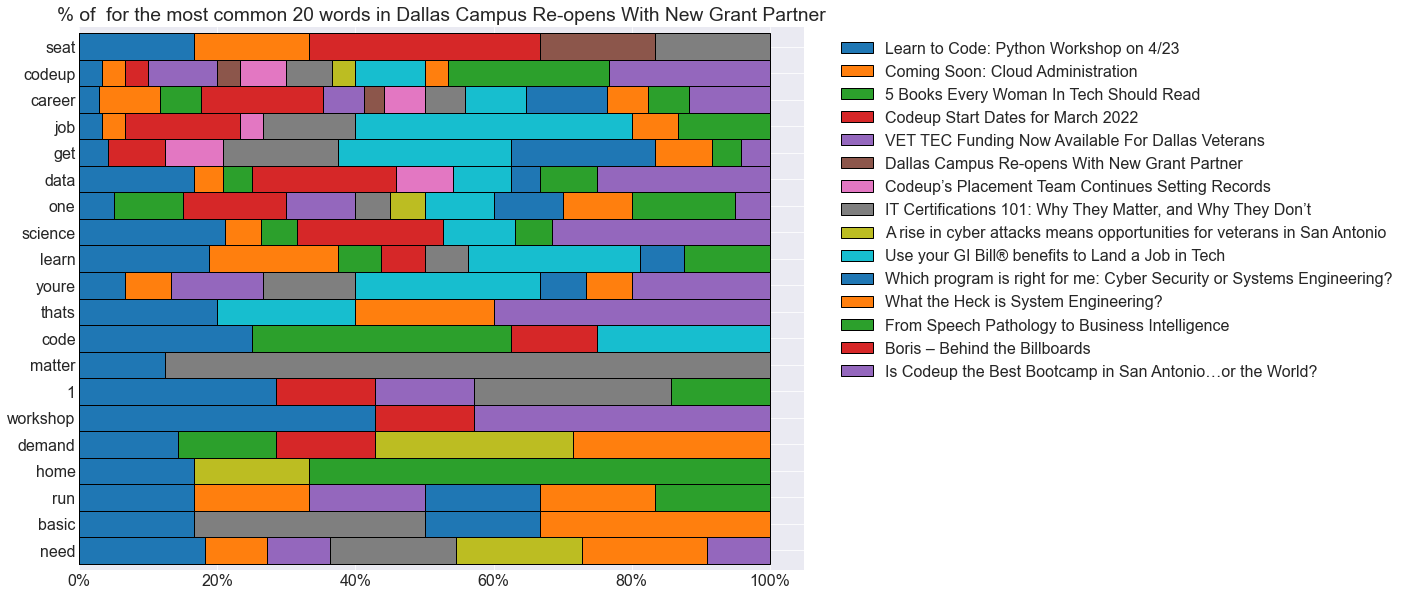

<Figure size 936x576 with 0 Axes>

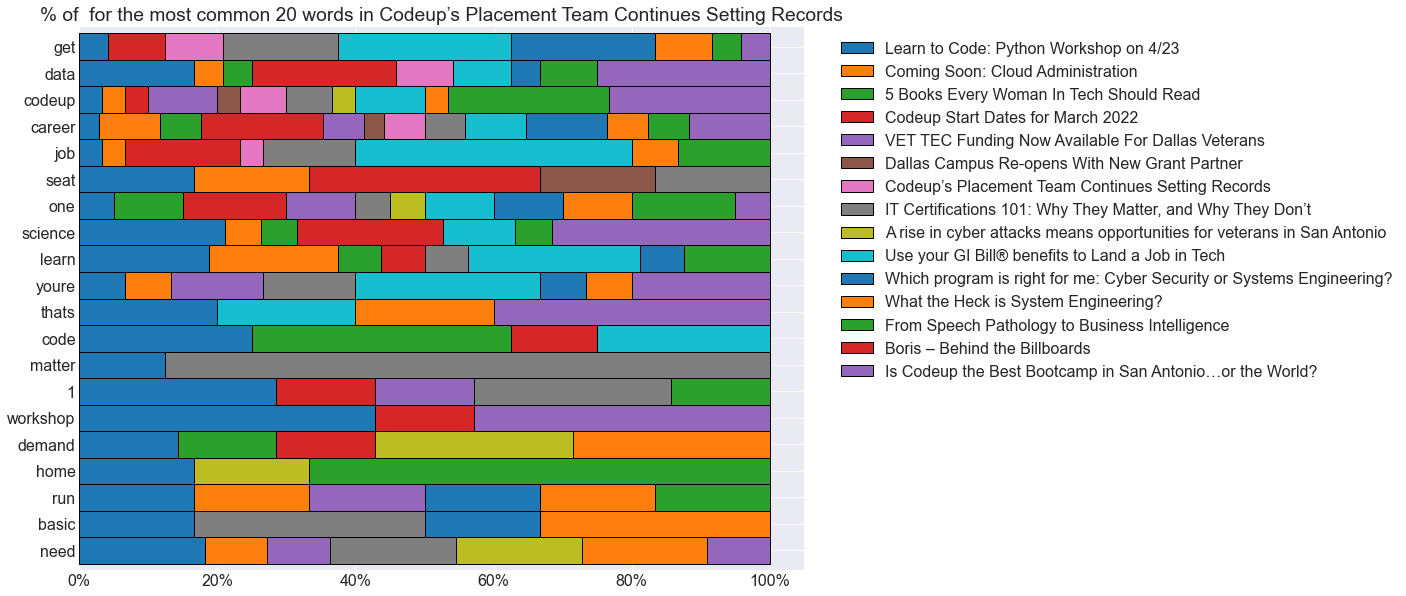

<Figure size 936x576 with 0 Axes>

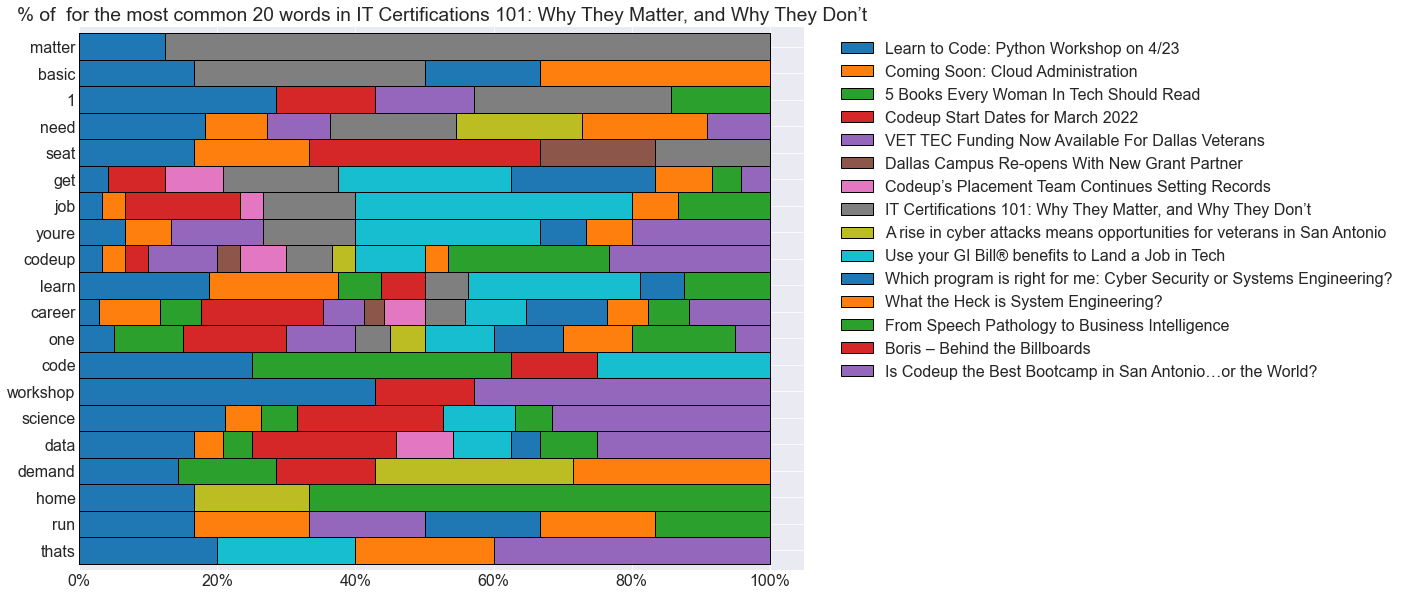

<Figure size 936x576 with 0 Axes>

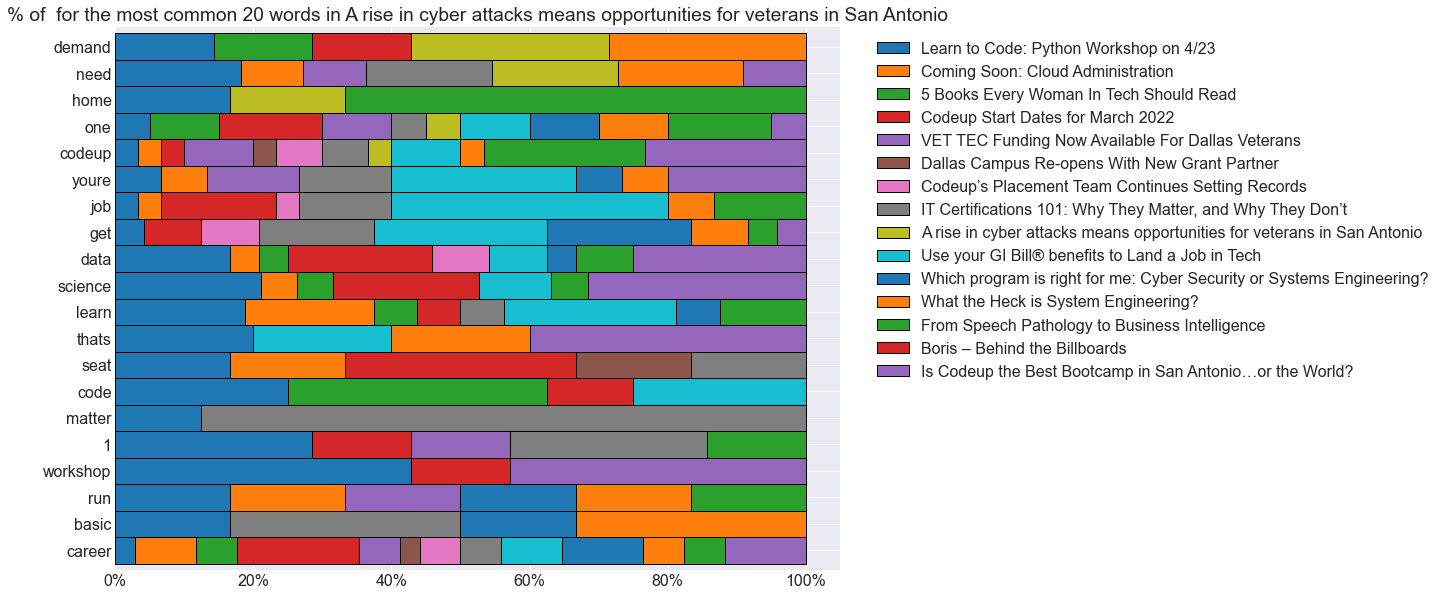

<Figure size 936x576 with 0 Axes>

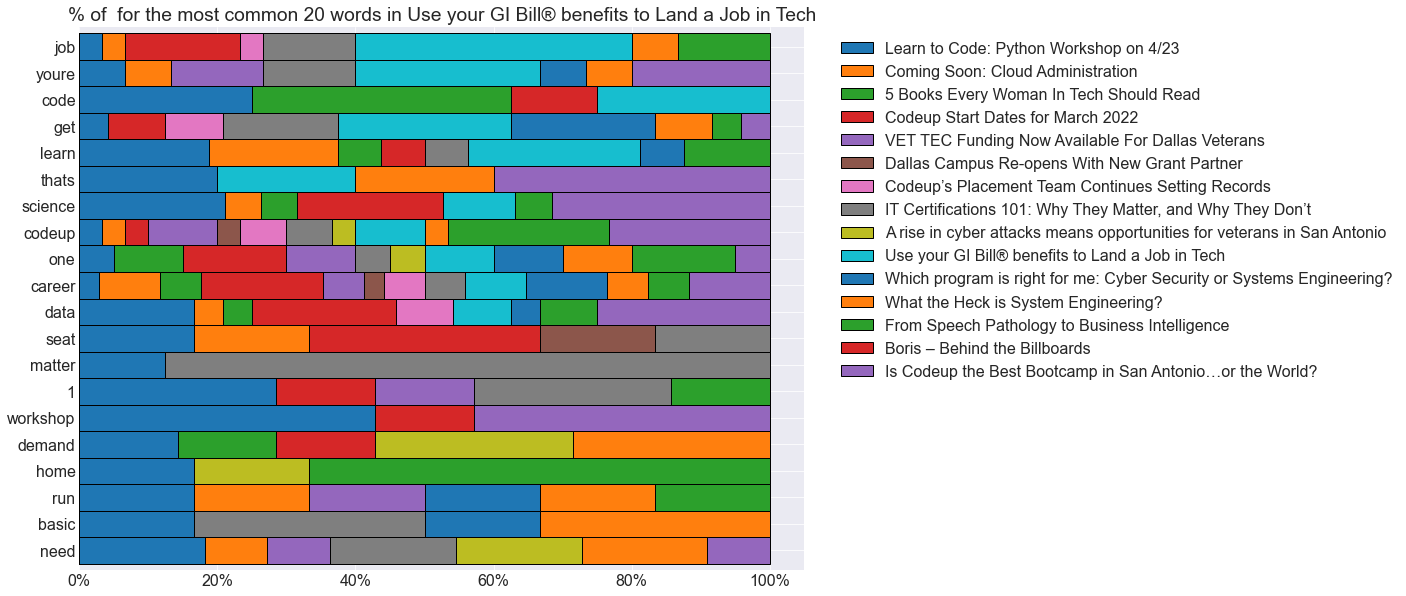

<Figure size 936x576 with 0 Axes>

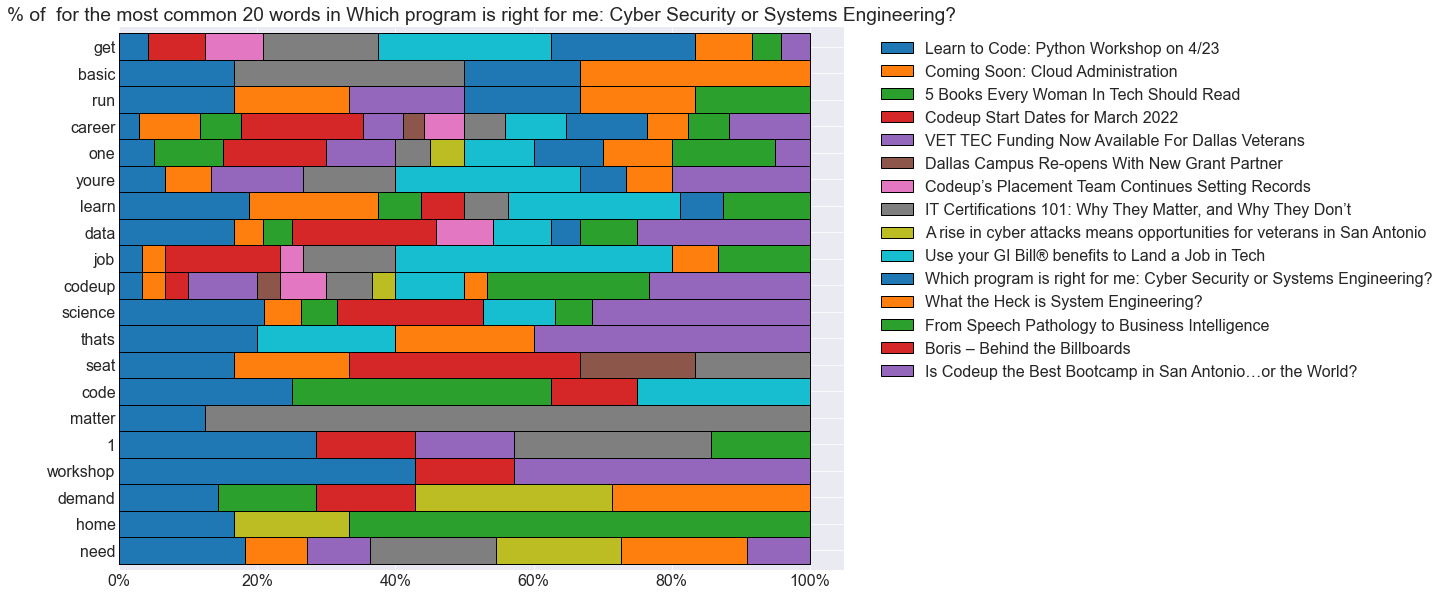

<Figure size 936x576 with 0 Axes>

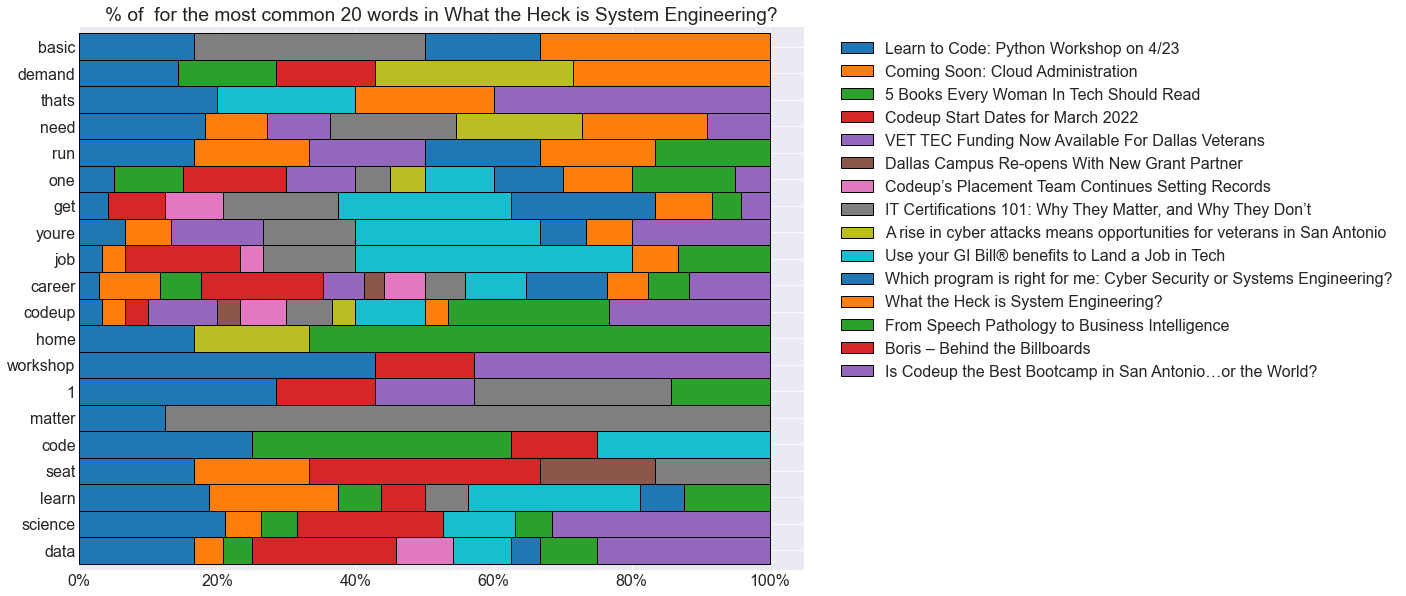

<Figure size 936x576 with 0 Axes>

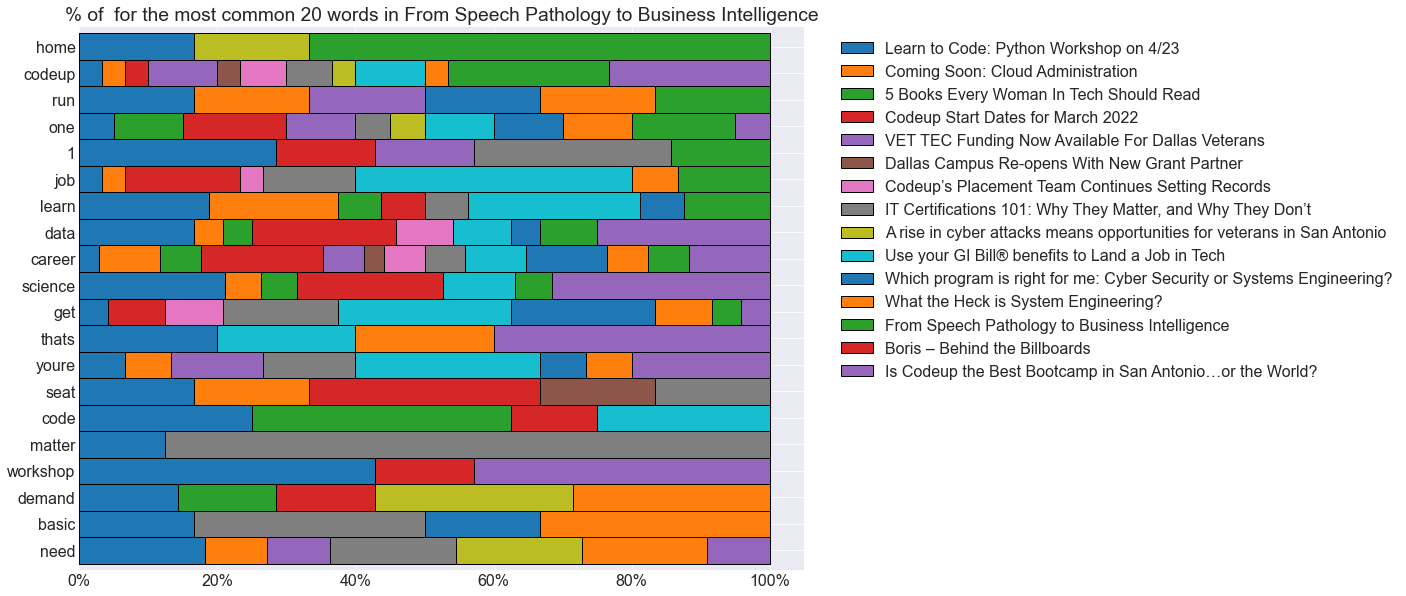

<Figure size 936x576 with 0 Axes>

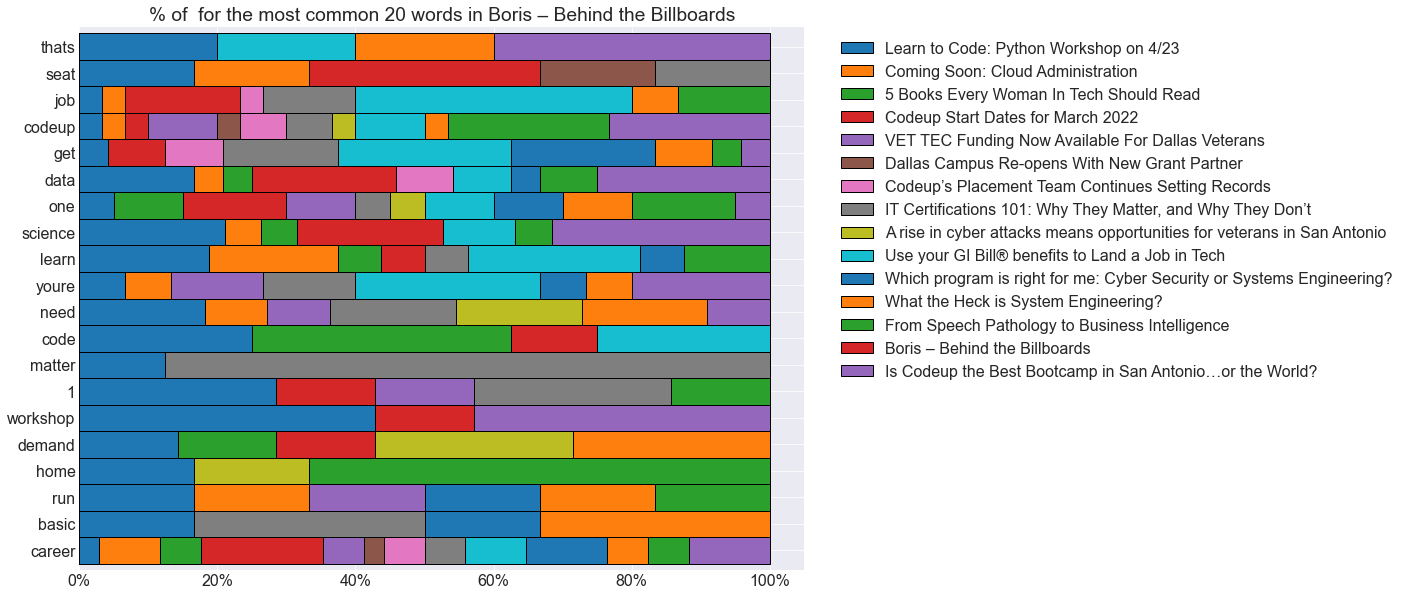

<Figure size 936x576 with 0 Axes>

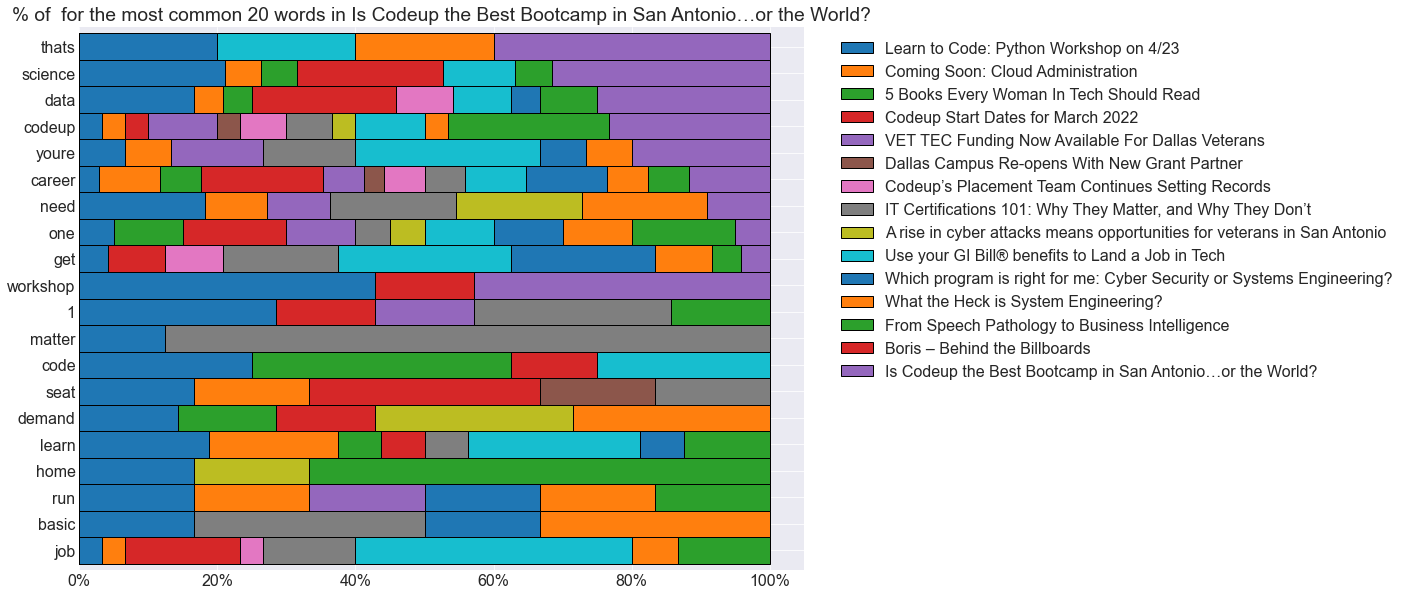

In [34]:
# Sorted by category 
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(13, 8))
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1).sort_values(by= column)
     .drop(columns='all_words')
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  for the most common 20 words in {column}')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

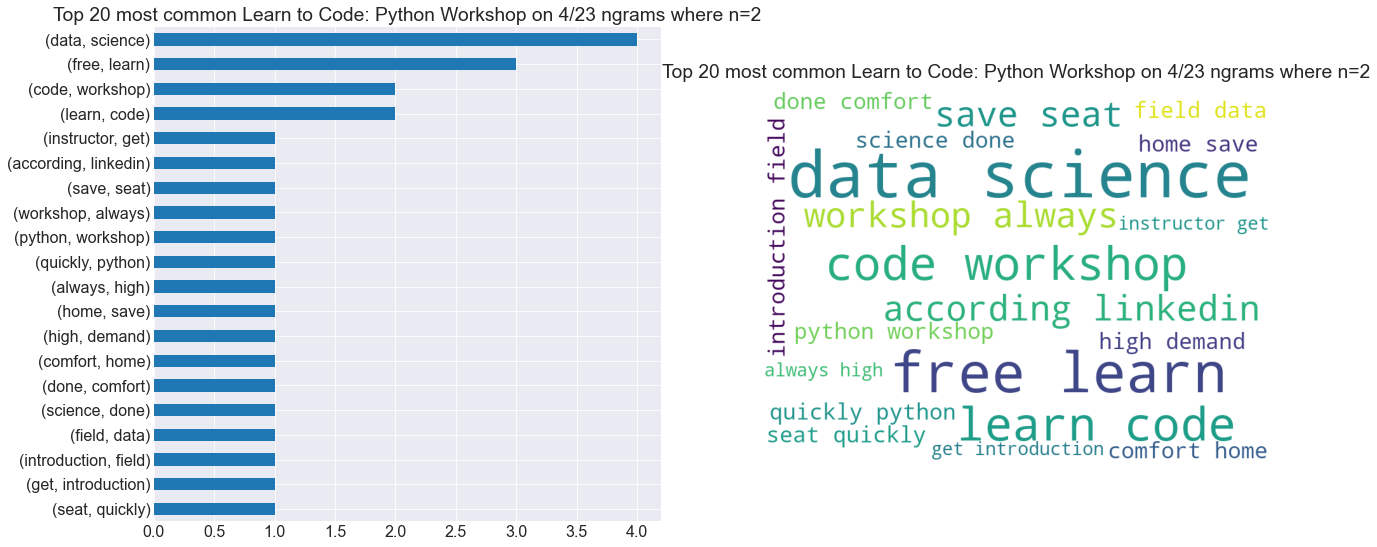

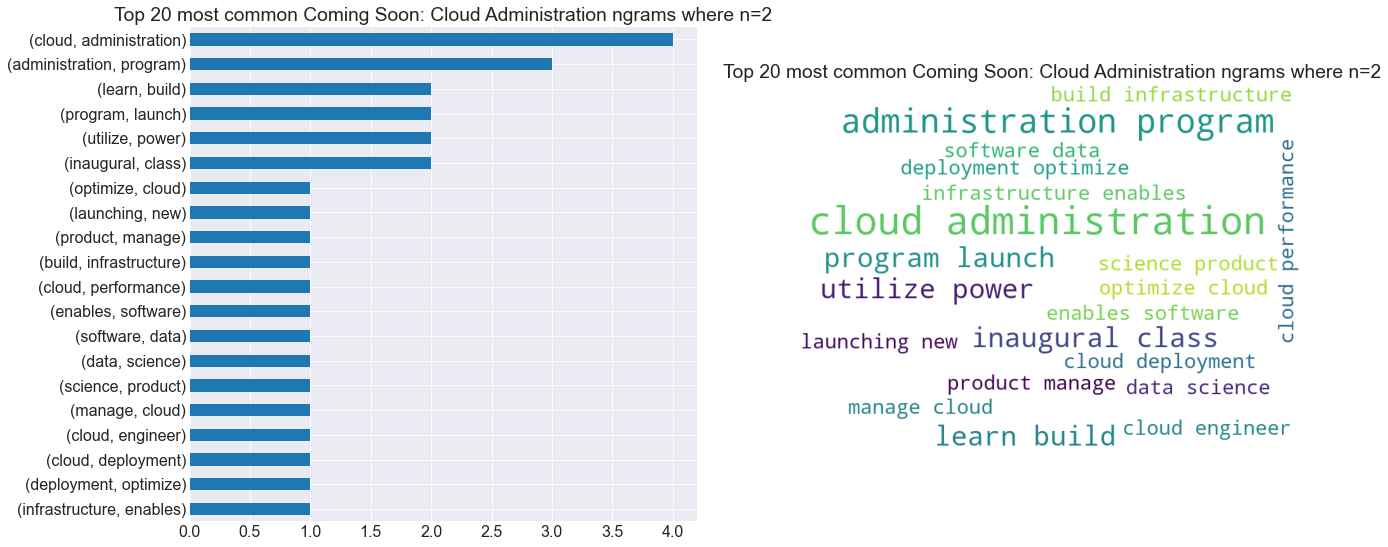

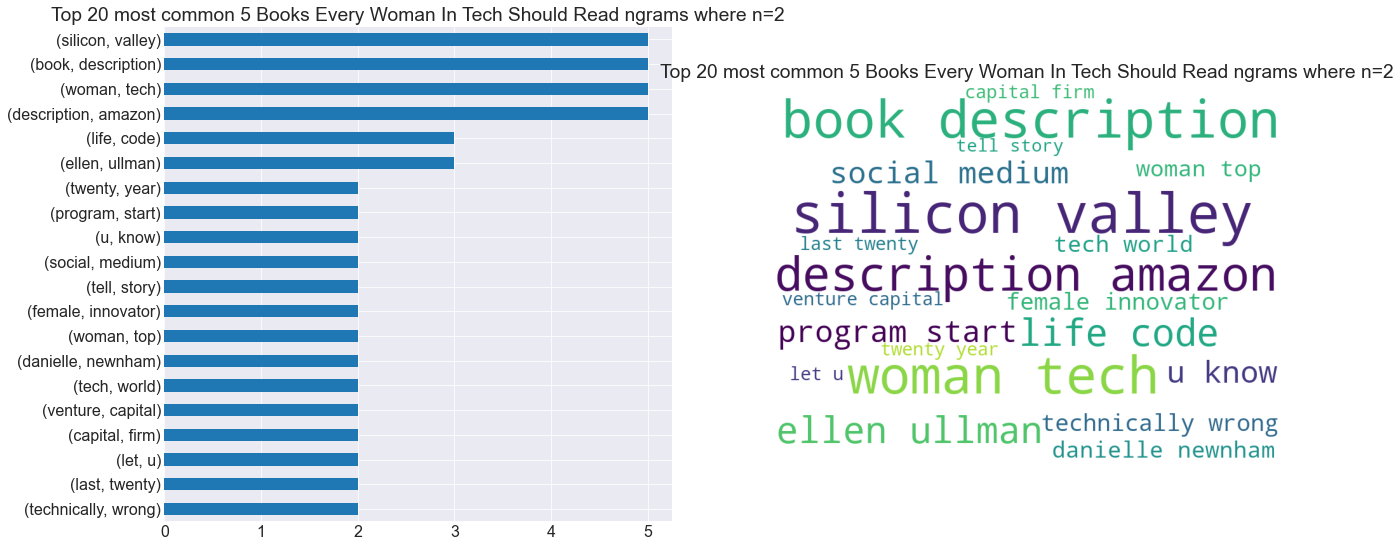

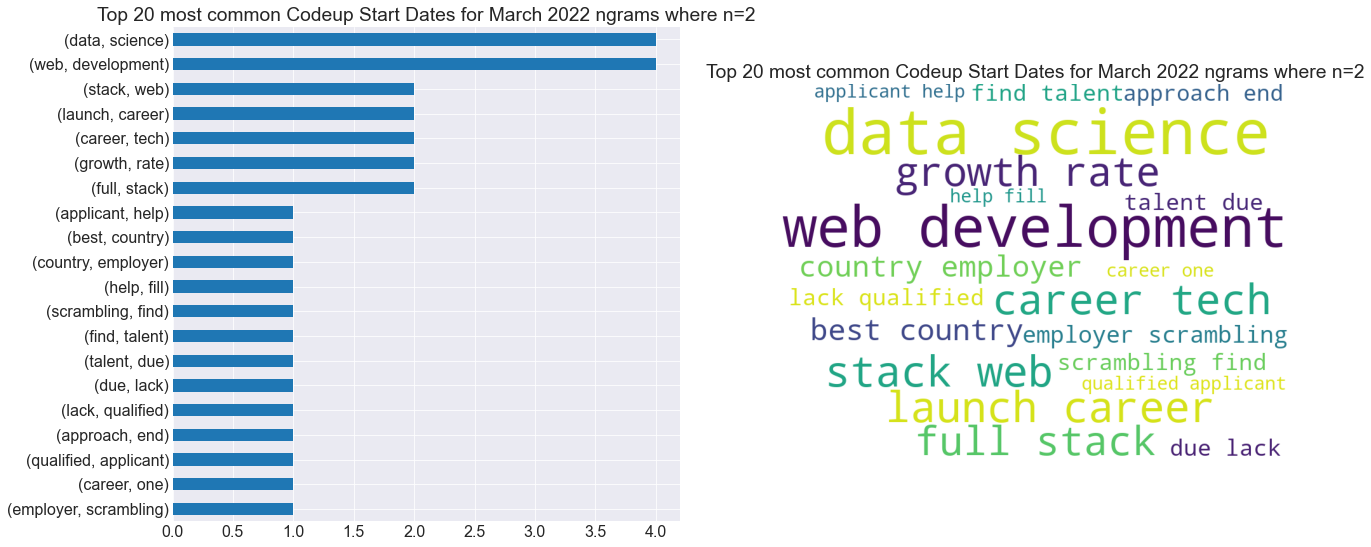

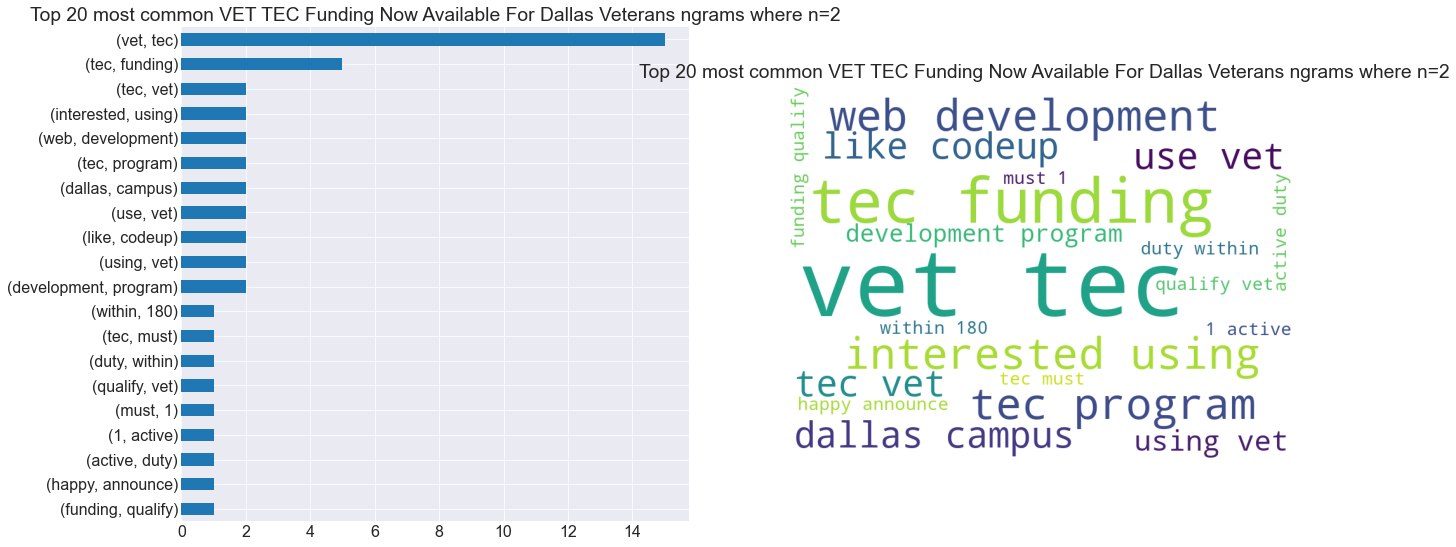

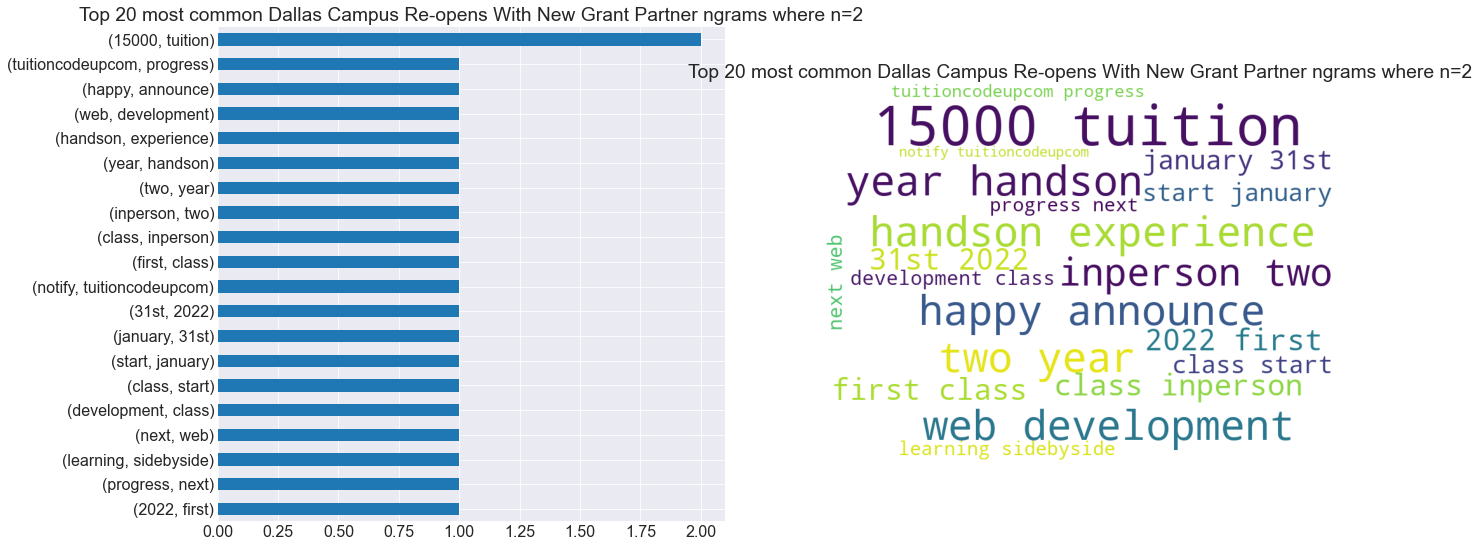

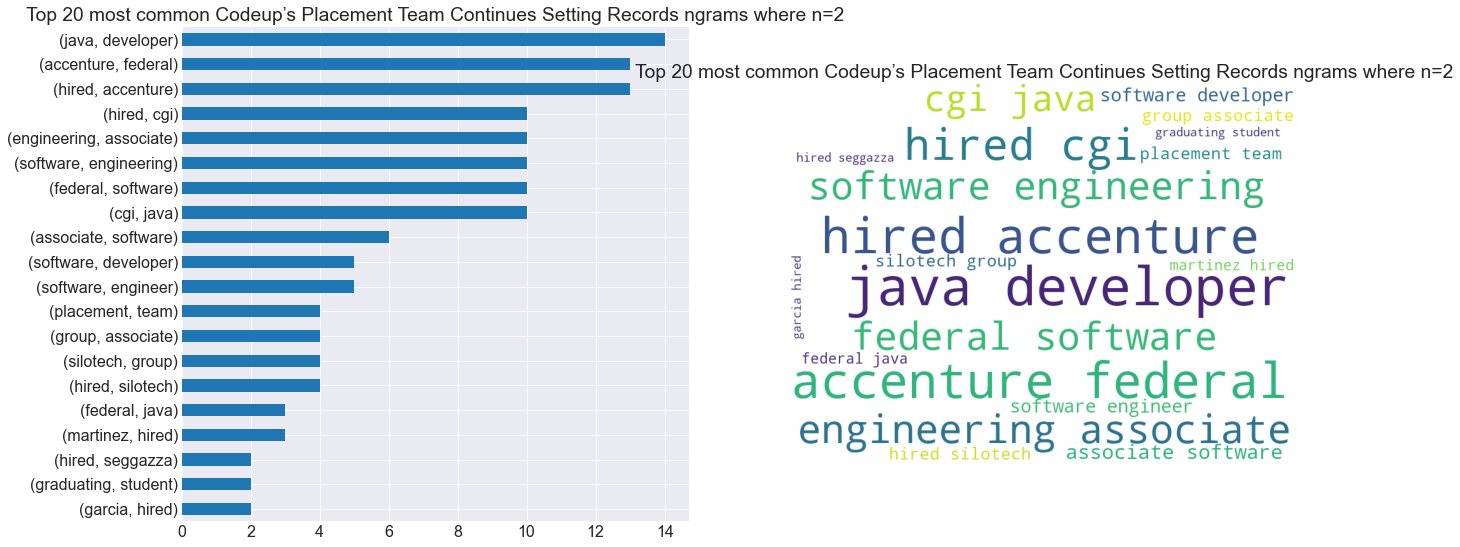

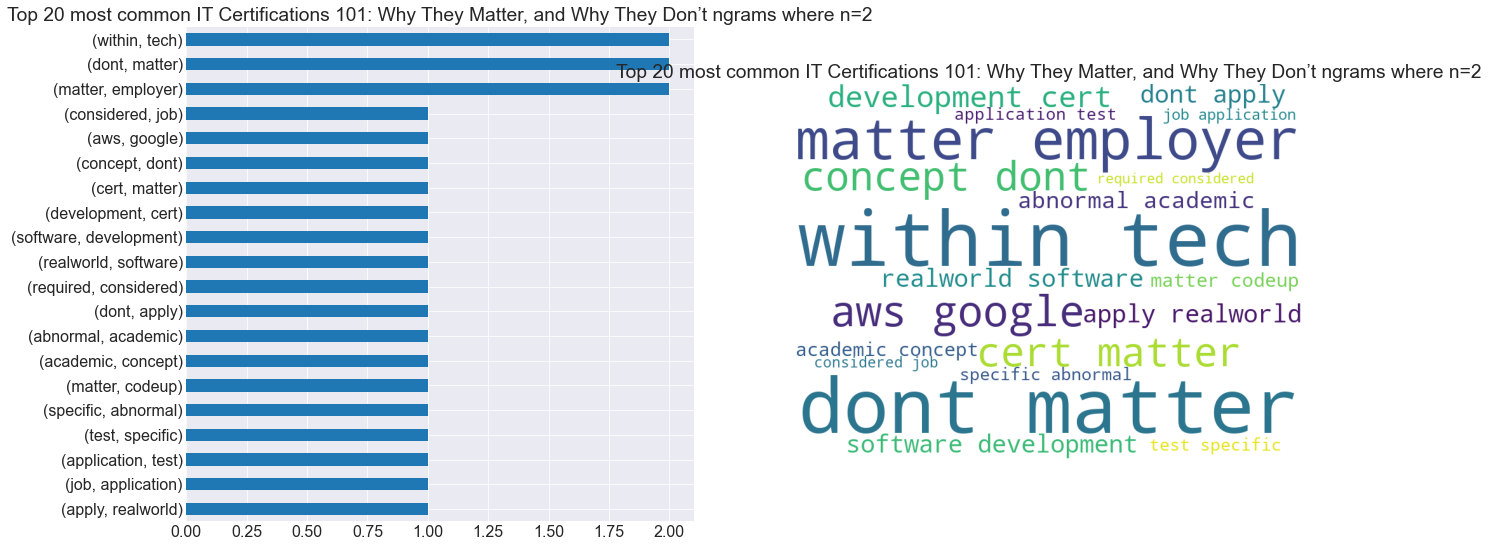

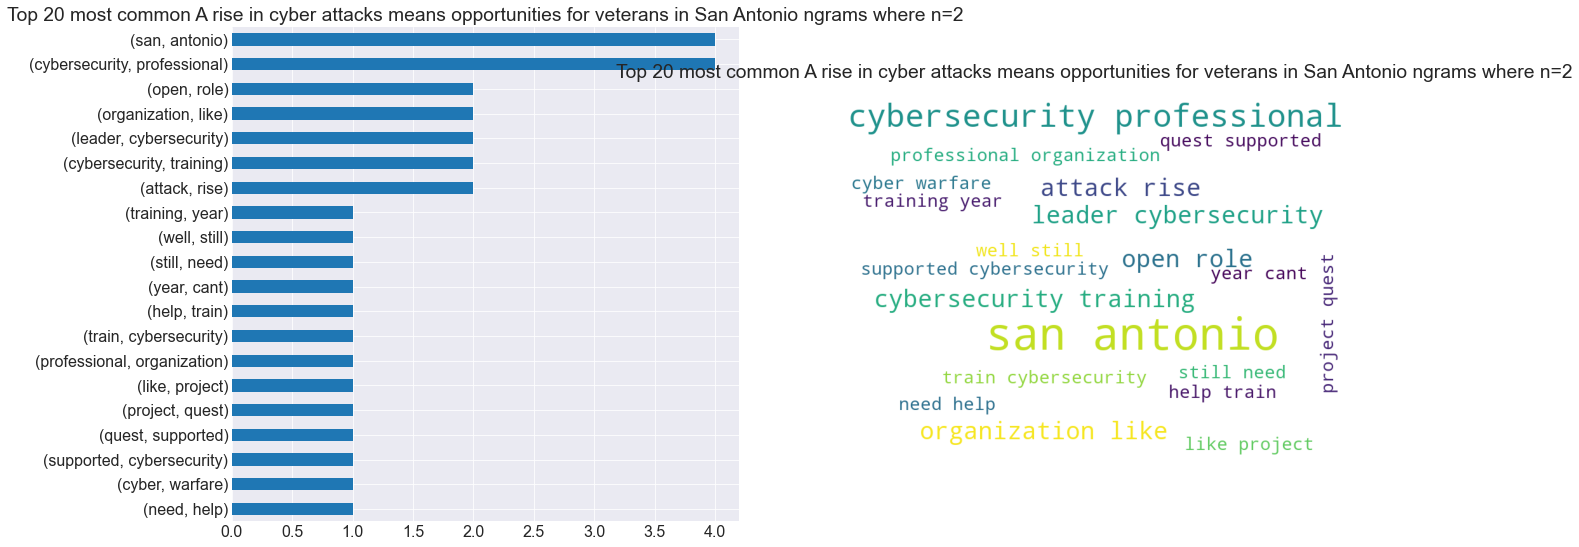

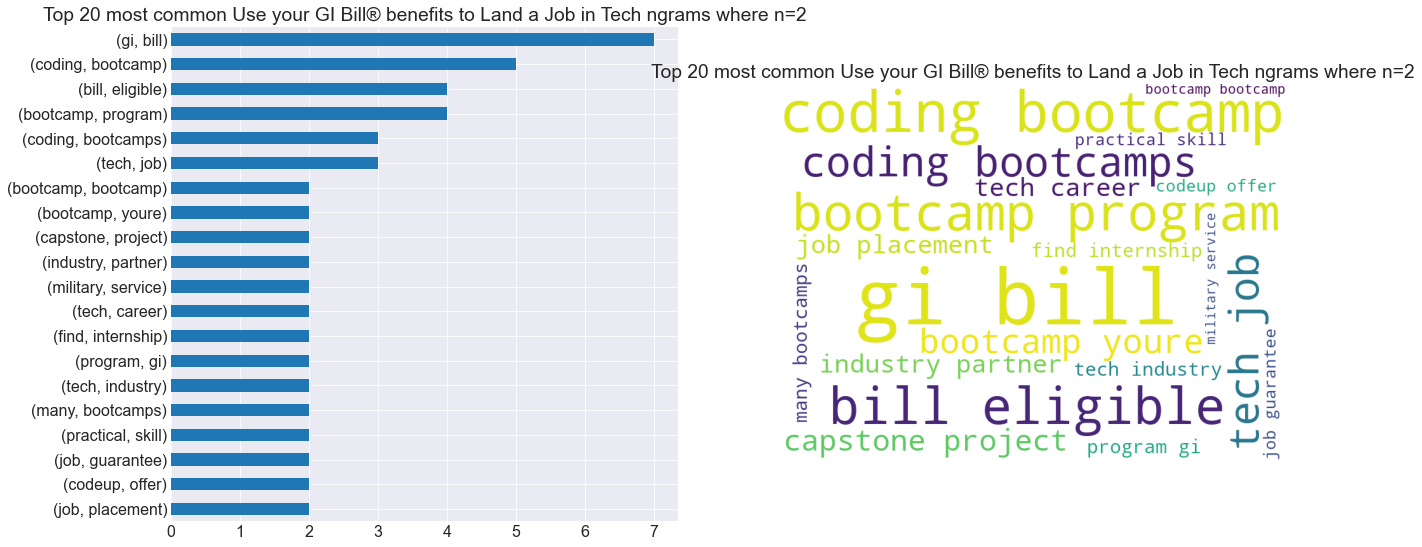

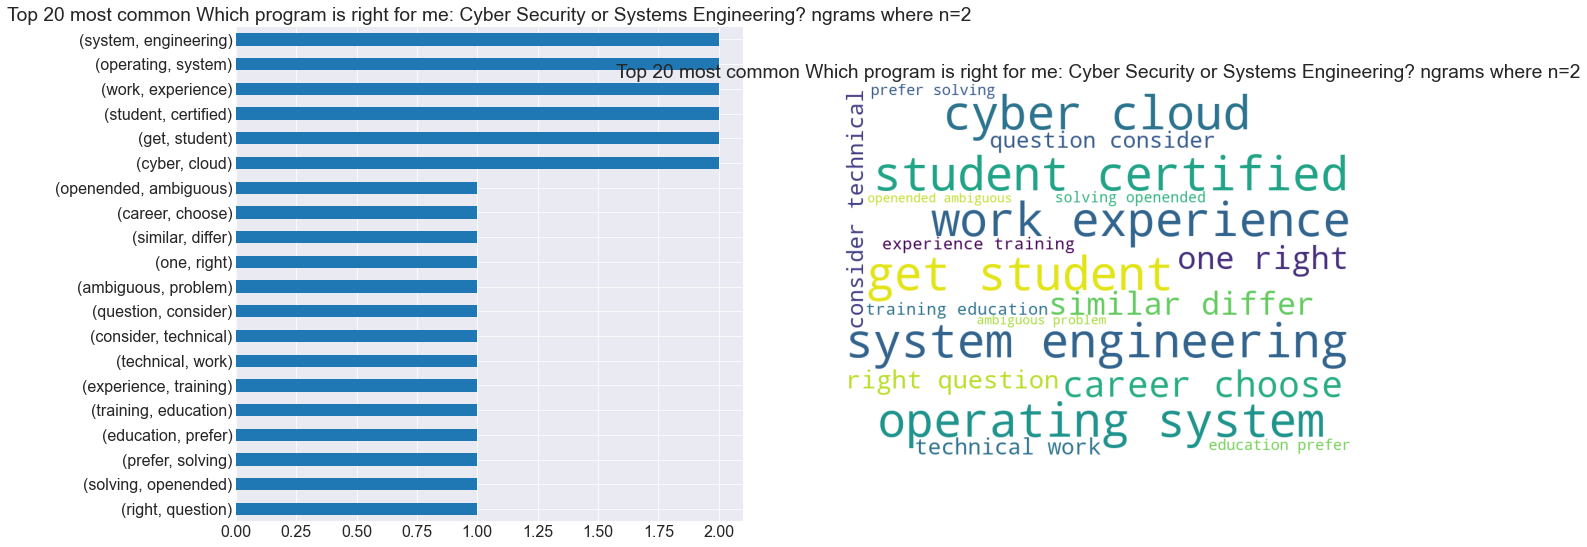

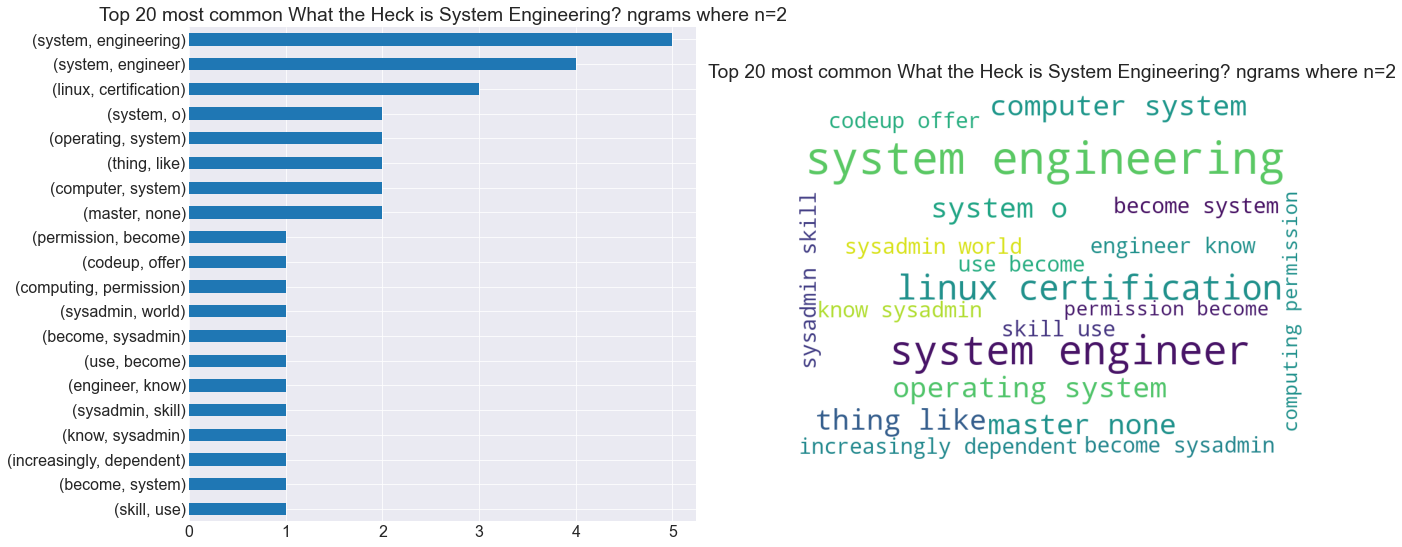

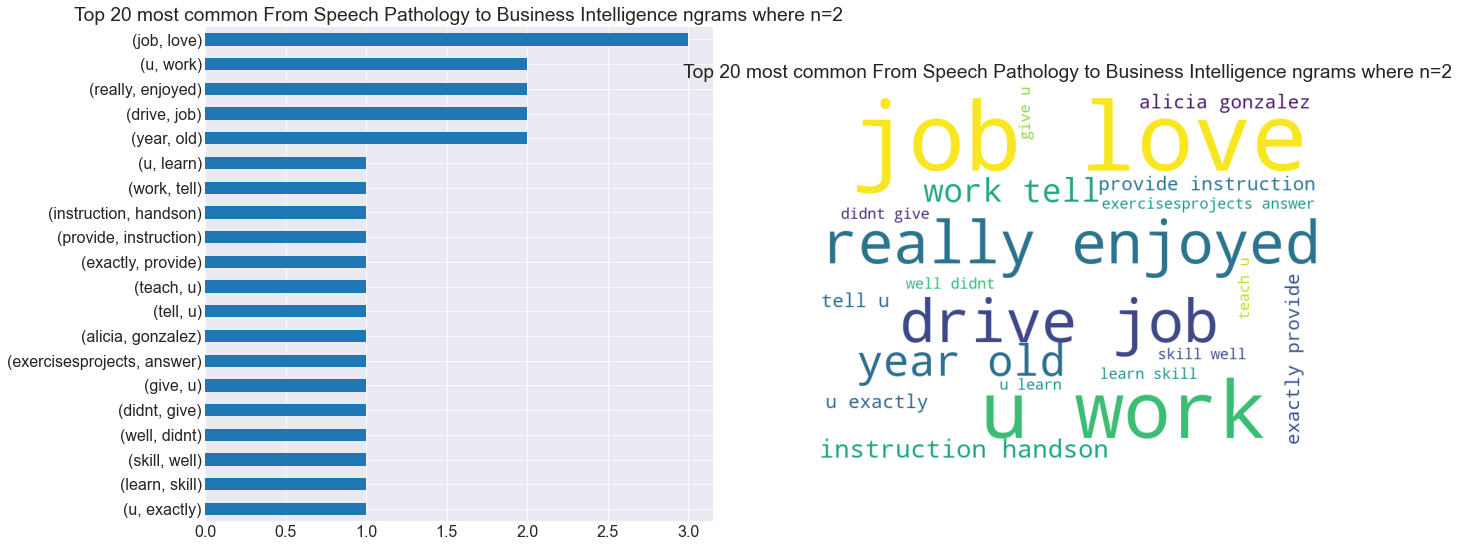

IndexError: index 0 is out of bounds for axis 0 with size 0

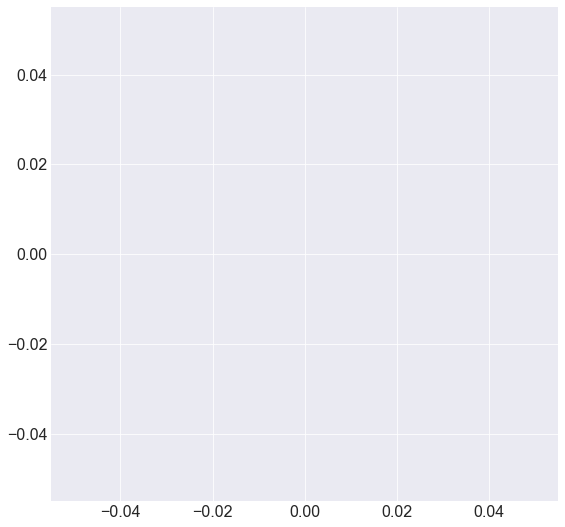

In [35]:
#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

<AxesSubplot:ylabel='Frequency'>

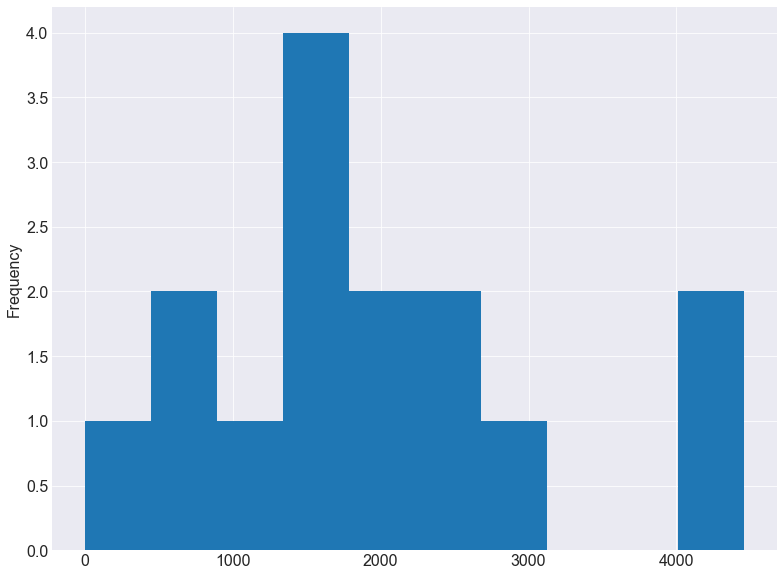

In [36]:
## new features
new_articles['article_length'] = new_articles.lemmatized.apply(len)

new_articles.groupby('title').article_length.mean()

new_articles.article_length.plot.hist()

In [37]:
new_articles['word_count'] = new_articles.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

<Figure size 1440x360 with 0 Axes>

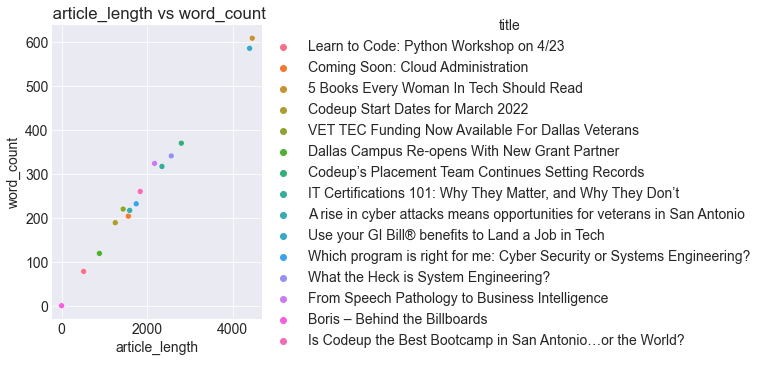

In [38]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=new_articles, y='word_count', x='article_length', hue='title')
plt.title( " article_length vs word_count")
plt.show()

In [39]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [40]:
new_articles['sentiment'] = new_articles.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [41]:
news_df = a.get_news_articles()

In [42]:
news_df

category                                              title  \
0        business  Rupee closes at all-time low of 77.50 against ...   
1        business  India's biggest IPO of LIC subscribed nearly 3...   
2        business  Layout of 'world's first Bitcoin City' in El S...   
3        business  Musk's $44 bn Twitter deal at risk of being re...   
4        business  Twitter will comply with EU content rules afte...   
..            ...                                                ...   
95  entertainment  Ran out of money during lockdown, in theatre y...   
96  entertainment  Sanjay told Big B 'I'm leaving because of Muku...   
97  entertainment  Calling Marvel films 'lesser art' disrespectfu...   
98  entertainment  Anupam hosts 'Fauda' actor Tsahi Halevi at his...   
99  entertainment  There's no cut footage of Cruise in 'Doctor St...   

                                              content          author  \
0   The Indian rupee weakened further on Monday to...  Pragya Swastik   
1   LIC's IPO, India's biggest IPO which opened on...  Pragya Swastik   
2   El Salvador's President Nayib Bukele has share...     Hiral Goyal   
3   Elon Musk's $44 billion offer to buy Twitter c...  Pragya Swastik   
4   Tesla CEO Elon Musk has said that Twitter will...  Ridham Gambhir   
..                                                ...             ...   
95  Actress Sarika said that she ran out of money ...  Amartya Sharma   
96  'Khuda Gawah' producer Manoj Desai said that S...      Ria Kapoor   
97  Actress Elizabeth Olsen, who portrays Scarlet ...   Kriti Kambiri   
98  Anupam Kher hosted Israeli actor Tsahi Halevi,...      Udit Gupta   
99  'Doctor Strange in the Multiverse of Madness' ...  Amartya Sharma   

                   published  
0   2022-05-09T15:27:43.000Z  
1   2022-05-09T14:10:38.000Z  
2   2022-05-10T13:24:11.000Z  
3   2022-05-10T09:16:16.000Z  
4   2022-05-10T07:37:59.000Z  
..                       ...  
95  2022-05-10T12:41:52.000Z  
96  2022-05-10T10:42:27.000Z  
97  2022-05-10T11:36:54.000Z  
98  2022-05-10T11:45:49.000Z  
99  2022-05-10T12:30:33.000Z  

[100 rows x 5 columns]

In [44]:
news_df=prep.prepare_data(news_df, 'content', ['said'])

In [45]:
news_df.head()

category                                              title  \
0  business  Rupee closes at all-time low of 77.50 against ...   
1  business  India's biggest IPO of LIC subscribed nearly 3...   
2  business  Layout of 'world's first Bitcoin City' in El S...   
3  business  Musk's $44 bn Twitter deal at risk of being re...   
4  business  Twitter will comply with EU content rules afte...   

                                             content          author  \
0  The Indian rupee weakened further on Monday to...  Pragya Swastik   
1  LIC's IPO, India's biggest IPO which opened on...  Pragya Swastik   
2  El Salvador's President Nayib Bukele has share...     Hiral Goyal   
3  Elon Musk's $44 billion offer to buy Twitter c...  Pragya Swastik   
4  Tesla CEO Elon Musk has said that Twitter will...  Ridham Gambhir   

                  published  \
0  2022-05-09T15:27:43.000Z   
1  2022-05-09T14:10:38.000Z   
2  2022-05-10T13:24:11.000Z   
3  2022-05-10T09:16:16.000Z   
4  2022-05-10T07:37:59.000Z   

                                               clean  \
0  indian rupee weakened monday close new alltime...   
1  lics ipo indias biggest ipo opened may 4 close...   
2  el salvadors president nayib bukele shared lay...   
3  elon musks 44 billion offer buy twitter could ...   
4  tesla ceo elon musk twitter comply european un...   

                                             stemmed  \
0  indian rupe weaken monday close new alltim low...   
1  lic ipo india biggest ipo open may 4 close may...   
2  el salvador presid nayib bukel share layout wo...   
3  elon musk 44 billion offer buy twitter could g...   
4  tesla ceo elon musk twitter compli european un...   

                                          lemmatized  
0  indian rupee weakened monday close new alltime...  
1  lics ipo india biggest ipo opened may 4 closed...  
2  el salvador president nayib bukele shared layo...  
3  elon musk 44 billion offer buy twitter could g...  
4  tesla ceo elon musk twitter comply european un...

In [46]:
# change value counts to list of languages
list_cat = list(news_df.category.value_counts().index)

In [47]:
# join all the text of each categotyb
join_text ={}
for cat in list_cat :
    join_text[cat] = prep.basic_clean(' '.join(news_df[news_df.category == cat].lemmatized))

# add all words 
join_text['all_words']= prep.basic_clean(' '.join(news_df.lemmatized))

In [48]:
join_text.keys()

dict_keys(['business', 'sports', 'technology', 'entertainment', 'all_words'])

In [49]:
# create a word_count df
word_counts= pd.DataFrame()
for cat in join_text:
    word_counts[cat] = pd.Series(join_text[cat].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [50]:
word_counts.head()

business  sports  technology  entertainment  all_words
time           11       1           2              3         17
crore           9       0           0              1         10
musk            8       0          14              0         22
may             8       2           2              1         13
billion         8       0           5              0         13

<Figure size 1440x1080 with 0 Axes>

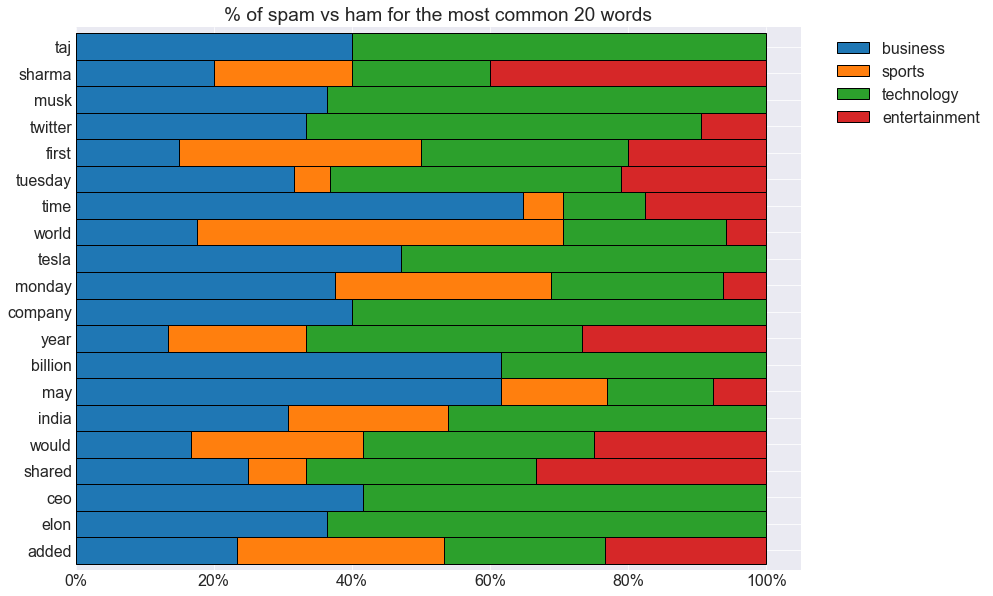

In [51]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1).sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

<Figure size 936x576 with 0 Axes>

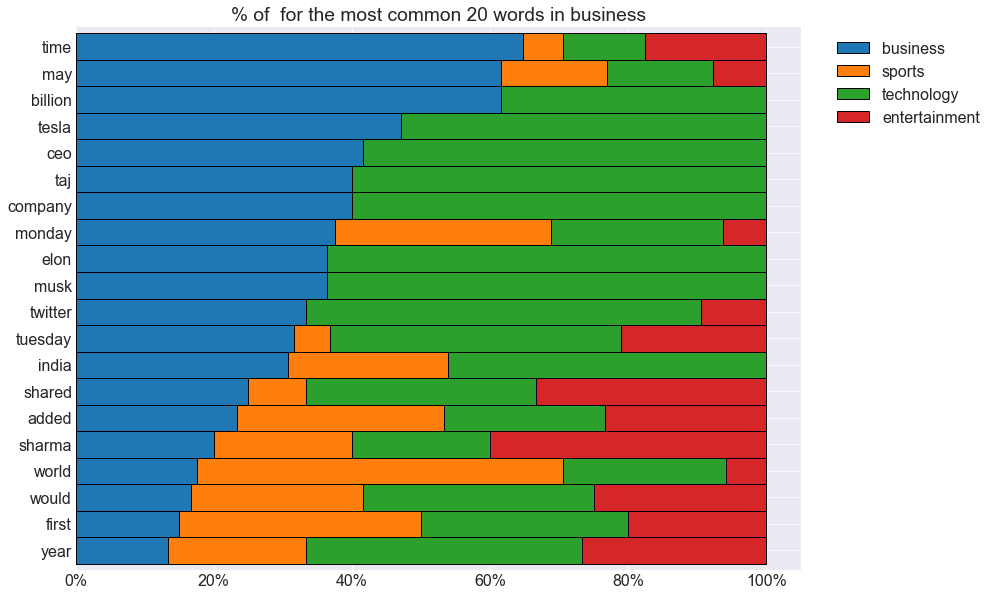

<Figure size 936x576 with 0 Axes>

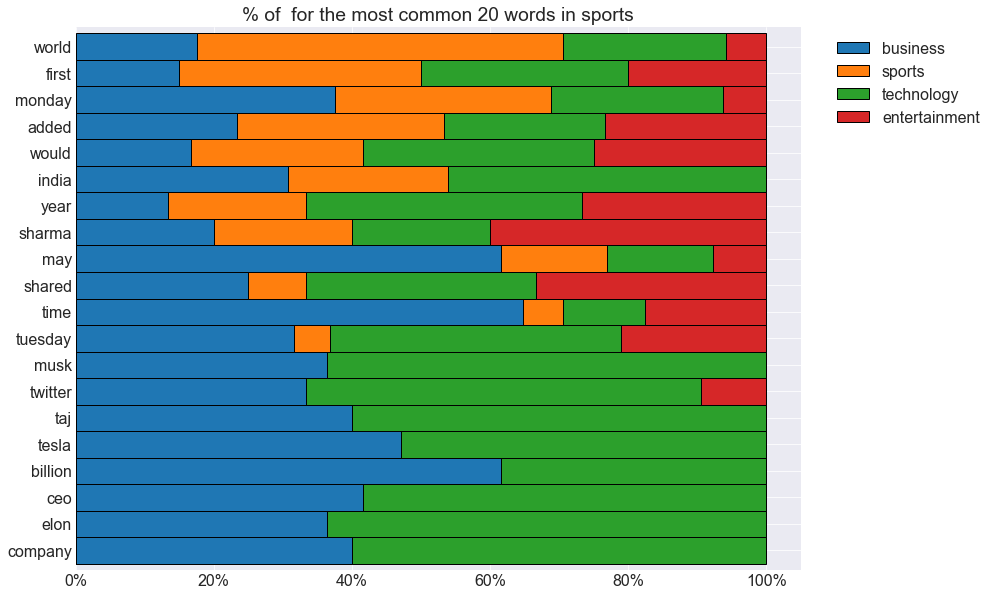

<Figure size 936x576 with 0 Axes>

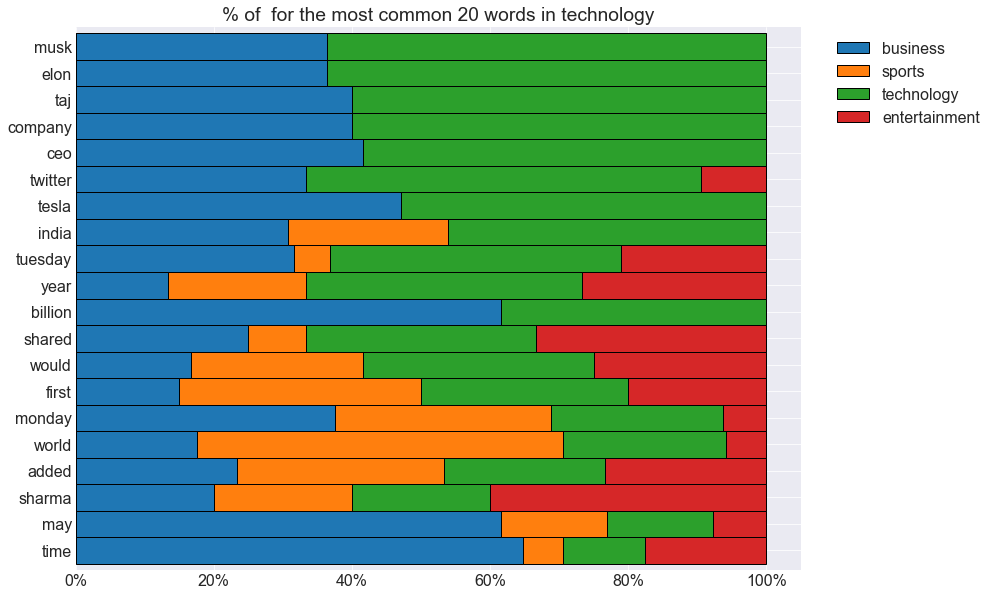

<Figure size 936x576 with 0 Axes>

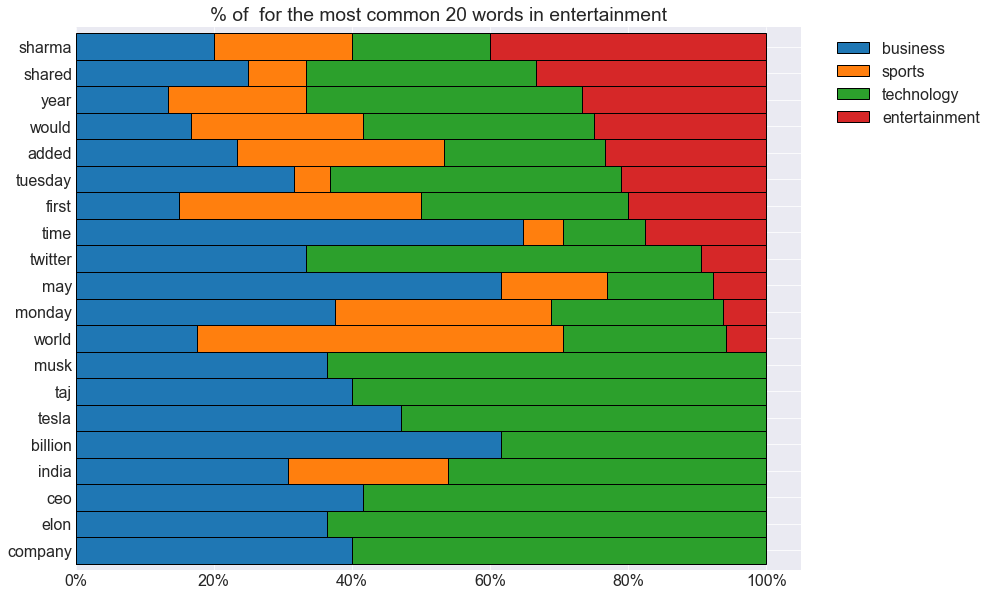

In [52]:
# Sorted by category 
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(13, 8))
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1).sort_values(by= column)
     .drop(columns='all_words')
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  for the most common 20 words in {column}')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

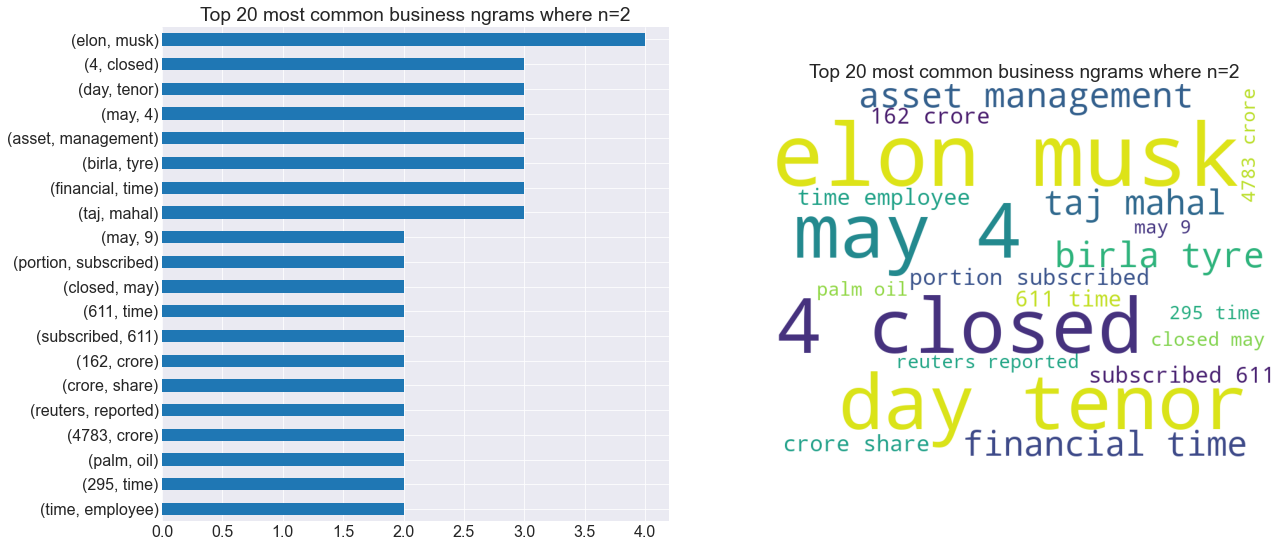

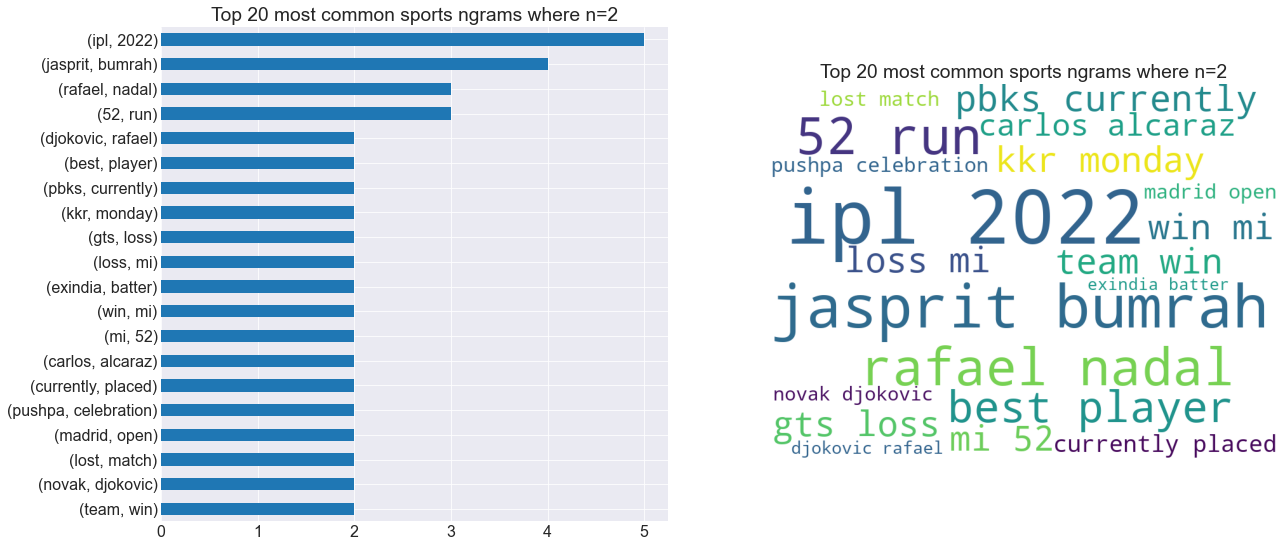

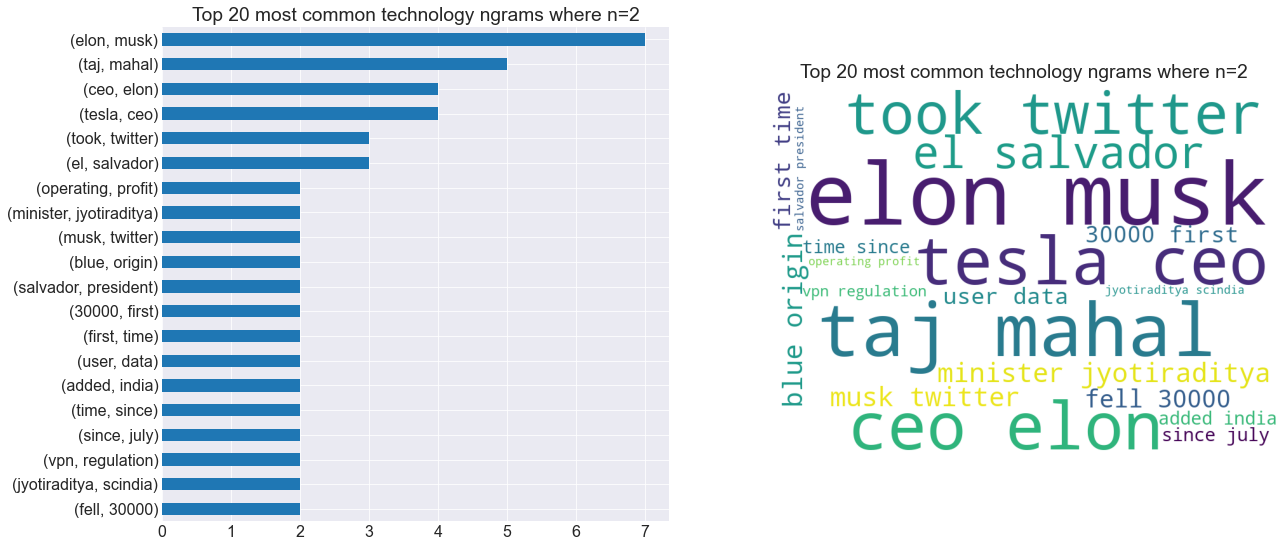

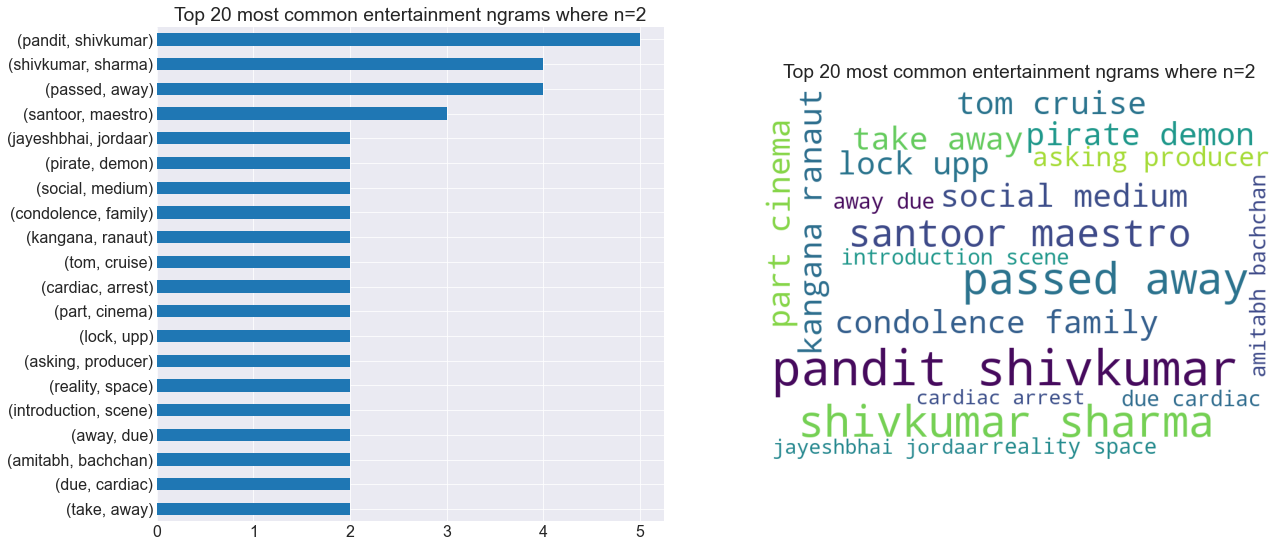

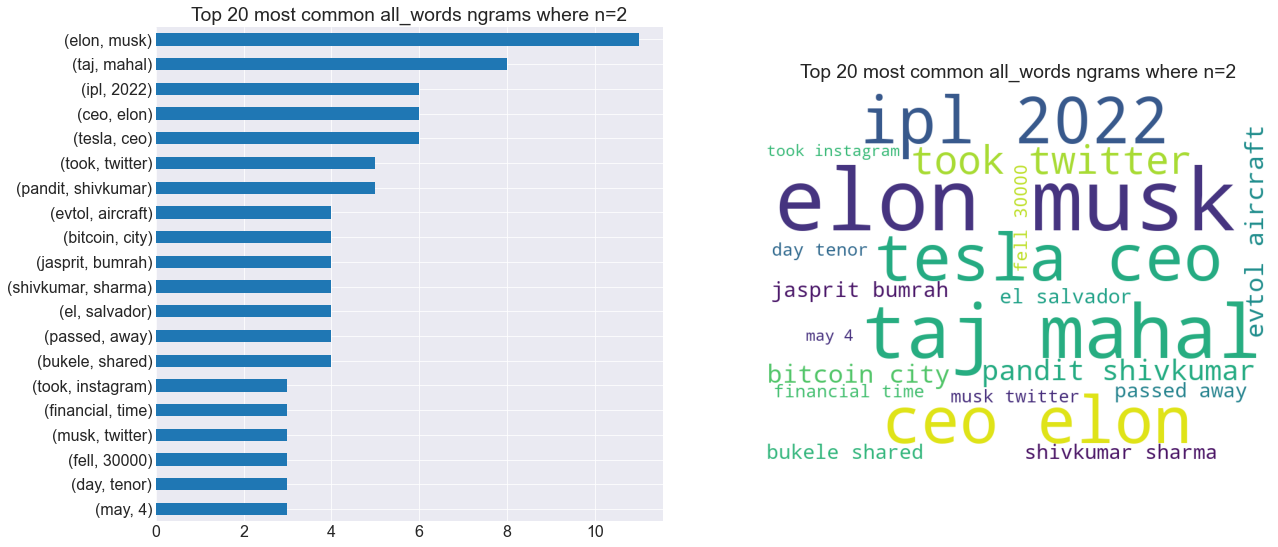

In [53]:
#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

<AxesSubplot:ylabel='Frequency'>

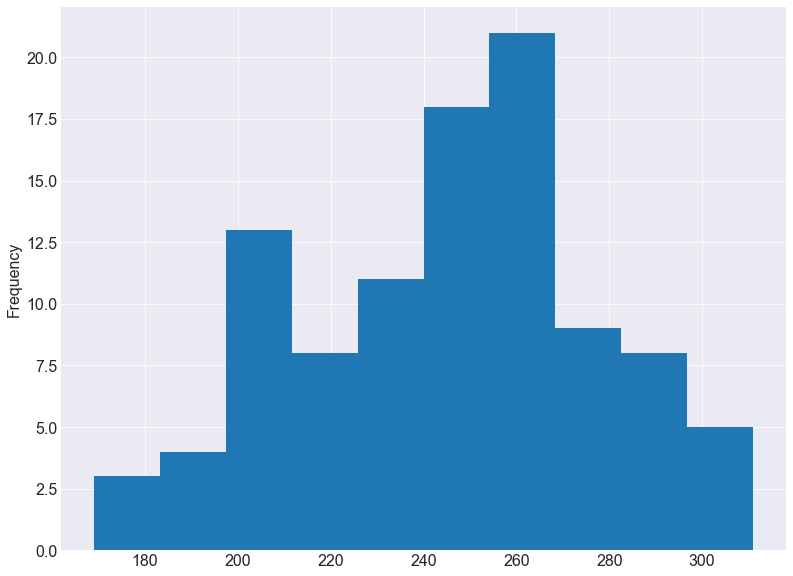

In [54]:
## new features
news_df['article_length'] = news_df.lemmatized.apply(len)

news_df.groupby('category').article_length.mean()

news_df.article_length.plot.hist()

In [55]:
news_df['word_count'] = news_df.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

<Figure size 1440x360 with 0 Axes>

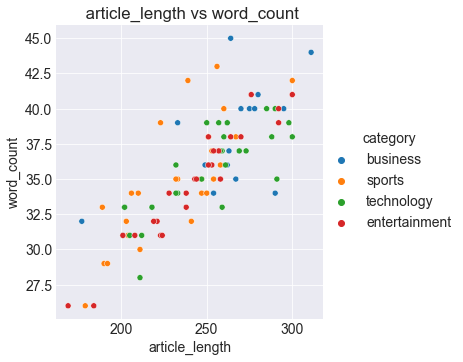

In [56]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=news_df, y='word_count', x='article_length', hue='category')
plt.title( " article_length vs word_count")
plt.show()

In [57]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [58]:
news_df['sentiment'] = news_df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [59]:
news_df.head()

category                                              title  \
0  business  Rupee closes at all-time low of 77.50 against ...   
1  business  India's biggest IPO of LIC subscribed nearly 3...   
2  business  Layout of 'world's first Bitcoin City' in El S...   
3  business  Musk's $44 bn Twitter deal at risk of being re...   
4  business  Twitter will comply with EU content rules afte...   

                                             content          author  \
0  The Indian rupee weakened further on Monday to...  Pragya Swastik   
1  LIC's IPO, India's biggest IPO which opened on...  Pragya Swastik   
2  El Salvador's President Nayib Bukele has share...     Hiral Goyal   
3  Elon Musk's $44 billion offer to buy Twitter c...  Pragya Swastik   
4  Tesla CEO Elon Musk has said that Twitter will...  Ridham Gambhir   

                  published  \
0  2022-05-09T15:27:43.000Z   
1  2022-05-09T14:10:38.000Z   
2  2022-05-10T13:24:11.000Z   
3  2022-05-10T09:16:16.000Z   
4  2022-05-10T07:37:59.000Z   

                                               clean  \
0  indian rupee weakened monday close new alltime...   
1  lics ipo indias biggest ipo opened may 4 close...   
2  el salvadors president nayib bukele shared lay...   
3  elon musks 44 billion offer buy twitter could ...   
4  tesla ceo elon musk twitter comply european un...   

                                             stemmed  \
0  indian rupe weaken monday close new alltim low...   
1  lic ipo india biggest ipo open may 4 close may...   
2  el salvador presid nayib bukel share layout wo...   
3  elon musk 44 billion offer buy twitter could g...   
4  tesla ceo elon musk twitter compli european un...   

                                          lemmatized  article_length  \
0  indian rupee weakened monday close new alltime...             201   
1  lics ipo india biggest ipo opened may 4 closed...             264   
2  el salvador president nayib bukele shared layo...             261   
3  elon musk 44 billion offer buy twitter could g...             262   
4  tesla ceo elon musk twitter comply european un...             259   

   word_count  sentiment  
0          31    -0.8979  
1          45     0.5267  
2          36     0.7096  
3          39    -0.6369  
4          37     0.6124

In [60]:
news_df.groupby('category')[['sentiment']].median()

sentiment
category                
business          0.3400
entertainment     0.5719
sports            0.5106
technology        0.2263

In [61]:
news_df.groupby('category')[['sentiment']].mean()

sentiment
category                
business        0.138944
entertainment   0.335288
sports          0.286160
technology      0.143772

In [62]:
news_df.groupby('category')[['sentiment']].min()

sentiment
category                
business         -0.8979
entertainment    -0.9081
sports           -0.9657
technology       -0.6755

In [63]:
news_df.groupby('category')[['sentiment']].max()

sentiment
category                
business          0.8519
entertainment     0.9468
sports            0.9584
technology        0.9001

In [64]:
#good news!!
news_df.nlargest(5, 'sentiment')

category                                              title  \
38         sports  GT will be 1st team to qualify for playoffs in...   
87  entertainment  Thanks Ridhi Dogra for the idea of a jail: Ekt...   
29         sports  Shimron Hetmyer blessed with first child, RR s...   
82  entertainment  I'm glad I chose such a strong project for my ...   
40         sports  There's no fear of world in their game: Gavask...   

                                              content          author  \
38  Harbhajan Singh has said that GT are going to ...      Anant Kaur   
87  'Lock Upp' producer Ekta Kapoor took to Instag...  Amartya Sharma   
29  RR batter Shimron Hetmyer has been blessed wit...    Anmol Sharma   
82  Kangana Ranaut, who hosted the recently conclu...      Udit Gupta   
40  Commenting on Gujarat Titans' form in IPL 2022...      Anant Kaur   

                   published  \
38  2022-05-10T14:24:11.000Z   
87  2022-05-10T14:08:05.000Z   
29  2022-05-10T11:21:55.000Z   
82  2022-05-10T11:19:11.000Z   
40  2022-05-10T11:23:10.000Z   

                                                clean  \
38  harbhajan singh gt going beat lsg become first...   
87  lock upp producer ekta kapoor took instagram w...   
29  rr batter shimron hetmyer blessed first child ...   
82  kangana ranaut hosted recently concluded reali...   
40  commenting gujarat titans form ipl 2022 exindi...   

                                              stemmed  \
38  harbhajan singh gt go beat lsg becom first tea...   
87  lock upp produc ekta kapoor took instagram wro...   
29  rr batter shimron hetmyer bless first child rr...   
82  kangana ranaut host recent conclud realiti sho...   
40  comment gujarat titan form ipl 2022 exindia ca...   

                                           lemmatized  article_length  \
38  harbhajan singh gt going beat lsg become first...             203   
87  lock upp producer ekta kapoor took instagram w...             238   
29  rr batter shimron hetmyer blessed first child ...             247   
82  kangana ranaut hosted recently concluded reali...             264   
40  commenting gujarat titan form ipl 2022 exindia...             232   

    word_count  sentiment  
38          32     0.9584  
87          34     0.9468  
29          34     0.9432  
82          38     0.9260  
40          35     0.9042

In [65]:
#bad news :(
news_df.nsmallest(5, 'sentiment')

category                                              title  \
33         sports  31-yr-old ex-NBA player Adreian Payne shot dea...   
79  entertainment  Maharashtra announces state funeral for Pandit...   
0        business  Rupee closes at all-time low of 77.50 against ...   
84  entertainment  Prez Kovind condoles demise of Santoor maestro...   
19       business  Canara Bank detects frauds worth ₹3.9 cr in in...   

                                              content          author  \
33  Ex-NBA player Adreian Payne was shot dead in a...    Anmol Sharma   
79  The Maharashtra government has announced a sta...   Deepika Bhatt   
0   The Indian rupee weakened further on Monday to...  Pragya Swastik   
84  President Ram Nath Kovind on Tuesday condoled ...  Dharini Mudgal   
19  State-led Canara Bank is investigating fraud i...    Ananya Goyal   

                   published  \
33  2022-05-10T14:23:01.000Z   
79  2022-05-10T13:53:40.000Z   
0   2022-05-09T15:27:43.000Z   
84  2022-05-10T13:07:00.000Z   
19  2022-05-10T14:17:10.000Z   

                                                clean  \
33  exnba player adreian payne shot dead florida t...   
79  maharashtra government announced state funeral...   
0   indian rupee weakened monday close new alltime...   
84  president ram nath kovind tuesday condoled dea...   
19  stateled canara bank investigating fraud housi...   

                                              stemmed  \
33  exnba player adreian payn shot dead florida to...   
79  maharashtra govern announc state funer santoor...   
0   indian rupe weaken monday close new alltim low...   
84  presid ram nath kovind tuesday condol death sa...   
19  statel canara bank investig fraud hous financ ...   

                                           lemmatized  article_length  \
33  exnba player adreian payne shot dead florida t...             241   
79  maharashtra government announced state funeral...             253   
0   indian rupee weakened monday close new alltime...             201   
84  president ram nath kovind tuesday condoled dea...             292   
19  stateled canara bank investigating fraud housi...             262   

    word_count  sentiment  
33          32    -0.9657  
79          36    -0.9081  
0           31    -0.8979  
84          40    -0.8625  
19          36    -0.8271